In [1]:
import numpy as np
import pandas as pd
# This library is to visualise statistical graphs
import seaborn as sns

# This library is to visualise graphs
import matplotlib.pyplot as plt
# This library is to create displays
from IPython.display import Image
from matplotlib import cm
import plotly.express as px

Transaction Table
* TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
* TransactionAMT: transaction payment amount in USD
* ProductCD: product code, the product for each transaction
* card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
* addr: address
* dist: distance
* P_ and (R__) emaildomain: purchaser and recipient email domain
* C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
* D1-D15: timedelta, such as days between previous transaction, etc.
* M1-M9: match, such as names on card and address, etc.
* Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

Categorical Features

* ProductCD
* card1 - card6
* addr1, addr2
* P_emaildomain
* R_emaildomain
* M1 - M9

In [2]:
df_trans = pd.read_csv('../ieee-fraud-detection/train_transaction.csv')
df_identity = pd.read_csv('../ieee-fraud-detection/train_identity.csv')

In [3]:
df_trans.head(5)

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN   NaN  
2  NaN   NaN   NaN   NaN  
3  NaN   NaN   NaN   NaN  
4  0.0   0.0   0.0   0.0  

[5 rows x 394 columns]

In [4]:
df_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [5]:
print("number of Fraud transactions in the dataset: ", len(df_trans[df_trans['isFraud'] == 1]))
print("Total Number of transactions: ", len(df_trans))

number of Fraud transactions in the dataset:  20663
Total Number of transactions:  590540


In [6]:
df_trans.describe()

TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25%      6019.000000     214.000000     150.000000     166.000000   
50%      9678.000000     361.000000     150.000000     226.000000   
75%     14184.000000     512.000000     150.000000     226.000000   
max     18396.000000     600.000000     231.000000     237.000000   

               addr1          addr2  ...          V330           V331  \
count  524834.000000  524834.000000  ...  82351.000000   82351.000000   
mean      290.733794      86.800630  ...      0.775874     721.741883   
std       101.741072       2.690623  ...      4.727971    6217.223583   
min       100.000000      10.000000  ...      0.000000       0.000000   
25%       204.000000      87.000000  ...      0.000000       0.000000   
50%       299.000000      87.000000  ...      0.000000       0.000000   
75%       330.000000      87.000000  ...      0.000000       0.000000   
max       540.000000     102.000000  ...     55.000000  160000.000000   

                V332           V333          V334         V335          V336  \
count   82351.000000   82351.000000  82351.000000  82351.00000  82351.000000   
mean     1375.783644    1014.622782      9.807015     59.16455     28.530903   
std     11169.275702    7955.735482    243.861391    387.62948    274.576920   
min         0.000000       0.000000      0.000000      0.00000      0.000000   
25%         0.000000       0.000000      0.000000      0.00000      0.000000   
50%         0.000000       0.000000      0.000000      0.00000      0.000000   
75%        25.000000       0.000000      0.000000      0.00000      0.000000   
max    160000.000000  160000.000000  55125.000000  55125.00000  55125.000000   

                V337           V338           V339  
count   82351.000000   82351.000000   82351.000000  
mean       55.352422     151.160542     100.700882  
std       668.486833    1095.034387     814.946722  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max    104060.000000  104060.000000  104060.000000  

[8 rows x 380 columns]

In [7]:
df_trans.shape

(590540, 394)

In [8]:
np.sum(df_trans["TransactionID"].isin(df_identity["TransactionID"].unique()))/df_trans.shape[0]

0.2442391709283029

Only 24% of the transaction have identity info associated with them 

In [9]:
def check_cunique(df,cols):
    """check unique values for each column
    df: data frame. 
    cols: list. The columns of data frame to be counted
    """
    df_nunique = df[cols].nunique().to_frame()
    df_nunique = df_nunique.reset_index().rename(columns={'index': 'feat',0:'nunique'})
    return df_nunique

def feat_value_count(df,colname):
    """value count of each feature
    
    Args
    df: data frame.
    colname: string. Name of to be valued column
    
    Returns
    df_count: data frame.
    """
    df_count = df[colname].value_counts().to_frame().reset_index()
    df_count = df_count.rename(columns={'index':colname+'_values',colname:'counts'})
    return df_count


In [10]:
feat_value_count(df_trans,'isFraud')

isFraud_values  counts
0               0  569877
1               1   20663

In [12]:
df_nunique = check_cunique(df_trans,df_trans.select_dtypes(include=['object']).columns)
df_nunique

feat  nunique
0       ProductCD        5
1           card4        4
2           card6        4
3   P_emaildomain       59
4   R_emaildomain       60
5              M1        2
6              M2        2
7              M3        2
8              M4        3
9              M5        2
10             M6        2
11             M7        2
12             M8        2
13             M9        2

## CHECK MISSING DATA

In [13]:
def check_missing(df,cols=None,axis=0):
    """check data frame column missing situation
    Args
    df: data frame.
    cols: list. List of column names
    axis: int. 0 means column and 1 means row
    
    Returns
    missing_info: data frame. 
    """
    if cols != None:
        df = df[cols]
    missing_num = df.isnull().sum(axis).to_frame().rename(columns={0:'missing_num'})
    missing_num['missing_percent'] = df.isnull().mean(axis)*100
    return missing_num.sort_values(by='missing_percent',ascending = False) 

In [14]:
count = 0
for i in df_trans.columns:
    if df_trans[i].isnull().sum():
        count += 1
        print("Column: ", i, " Number of Null values: ",
              df_trans[i].isnull().sum(), df_trans[i].isnull().sum()/df_trans[i].shape[0])

print("Number of Columns with NULL values is", count)

Column:  card2  Number of Null values:  8933 0.015126833068039422
Column:  card3  Number of Null values:  1565 0.0026501168422122124
Column:  card4  Number of Null values:  1577 0.00267043722694483
Column:  card5  Number of Null values:  4259 0.007212043214684865
Column:  card6  Number of Null values:  1571 0.0026602770345785214
Column:  addr1  Number of Null values:  65706 0.1112642666034477
Column:  addr2  Number of Null values:  65706 0.1112642666034477
Column:  dist1  Number of Null values:  352271 0.596523520845328
Column:  dist2  Number of Null values:  552913 0.9362837403054831
Column:  P_emaildomain  Number of Null values:  94456 0.1599485216920107
Column:  R_emaildomain  Number of Null values:  453249 0.7675161716395164
Column:  D1  Number of Null values:  1269 0.0021488806854743116
Column:  D2  Number of Null values:  280797 0.4754919226470688
Column:  D3  Number of Null values:  262878 0.44514850814508755
Column:  D4  Number of Null values:  168922 0.2860466691502693
Column:

Column:  V125  Number of Null values:  314 0.0005317167338368274
Column:  V126  Number of Null values:  314 0.0005317167338368274
Column:  V127  Number of Null values:  314 0.0005317167338368274
Column:  V128  Number of Null values:  314 0.0005317167338368274
Column:  V129  Number of Null values:  314 0.0005317167338368274
Column:  V130  Number of Null values:  314 0.0005317167338368274
Column:  V131  Number of Null values:  314 0.0005317167338368274
Column:  V132  Number of Null values:  314 0.0005317167338368274
Column:  V133  Number of Null values:  314 0.0005317167338368274
Column:  V134  Number of Null values:  314 0.0005317167338368274
Column:  V135  Number of Null values:  314 0.0005317167338368274
Column:  V136  Number of Null values:  314 0.0005317167338368274
Column:  V137  Number of Null values:  314 0.0005317167338368274
Column:  V138  Number of Null values:  508595 0.8612371727571375
Column:  V139  Number of Null values:  508595 0.8612371727571375
Column:  V140  Number of 

Column:  V255  Number of Null values:  449124 0.7605310393876791
Column:  V256  Number of Null values:  449124 0.7605310393876791
Column:  V257  Number of Null values:  460110 0.7791343516103905
Column:  V258  Number of Null values:  460110 0.7791343516103905
Column:  V259  Number of Null values:  449124 0.7605310393876791
Column:  V260  Number of Null values:  460110 0.7791343516103905
Column:  V261  Number of Null values:  460110 0.7791343516103905
Column:  V262  Number of Null values:  460110 0.7791343516103905
Column:  V263  Number of Null values:  460110 0.7791343516103905
Column:  V264  Number of Null values:  460110 0.7791343516103905
Column:  V265  Number of Null values:  460110 0.7791343516103905
Column:  V266  Number of Null values:  460110 0.7791343516103905
Column:  V267  Number of Null values:  460110 0.7791343516103905
Column:  V268  Number of Null values:  460110 0.7791343516103905
Column:  V269  Number of Null values:  460110 0.7791343516103905
Column:  V270  Number of 

In [15]:
df_colmissing = check_missing(df_trans,cols=None,axis=0)
df_colmissing.head()

missing_num  missing_percent
dist2       552913        93.628374
D7          551623        93.409930
D13         528588        89.509263
D14         528353        89.469469
D12         525823        89.041047

/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='missing_percent'>

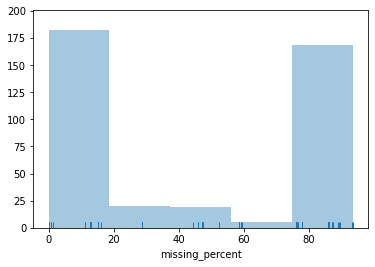

In [16]:
sns.distplot(df_colmissing.missing_percent, kde=False, rug=True)

In [17]:
df_rowmissing = check_missing(df_trans,cols=None,axis=1)
df_rowmissing.head()

missing_num  missing_percent
522237          300        76.142132
522280          296        75.126904
474068          292        74.111675
31095           292        74.111675
474362          292        74.111675

/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='missing_percent'>

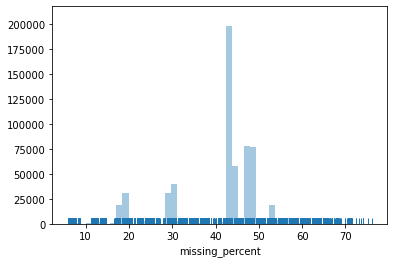

In [18]:
sns.distplot(df_rowmissing.missing_percent, kde=False, rug=True)

# Fraud Transactions 

In [19]:
def compare_cate(df,colname,targetname):
    """check target value difference of given category
    in the case of binary classifications.
    
    Args
    df: data frame.
    colname: string. The column name to be evaluated.
    targetname: string. The column name of the target variable.
    
    Returns
    None
    """
    # caculate aggregate stats
    df_cate = df.groupby([colname])[targetname].agg(['count', 'sum','mean'])
    df_cate.reset_index(inplace=True)
    print(df_cate)
    
    # plot visuals
    f, ax = plt.subplots(figsize=(15, 6))
    ax.tick_params(axis='x',labelrotation=90)
    plt1 = sns.lineplot(x=colname, y="mean", data=df_cate,color="r")

    for tl in ax.get_yticklabels():
        tl.set_color('r')

    ax2 = ax.twinx()
    plt2 = sns.barplot(x=colname, y="count", data=df_cate,
                       ax=ax2,alpha=0.5)
    

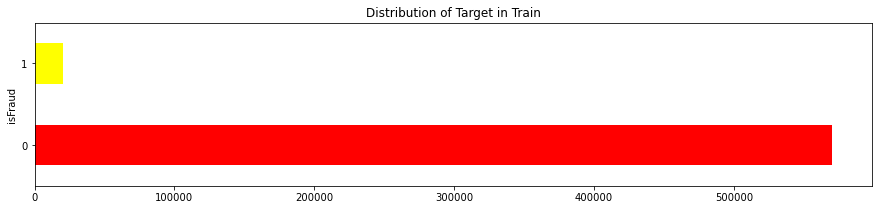

3.4990% of Transactions that are fraud in train 


In [20]:
df_trans.groupby('isFraud').count()['TransactionID'].plot(
    kind='barh',
    title='Distribution of Target in Train',
    figsize=(15, 3),
    color=['red', 'yellow'])
plt.show()

print('{:.4f}% of Transactions that are fraud in train '.format(df_trans['isFraud'].mean() * 100))

# TransactionAmt

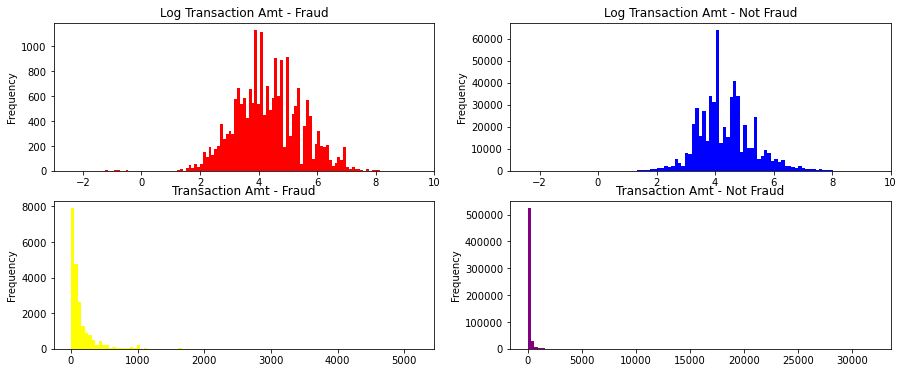

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 6))
df_trans.loc[df_trans['isFraud'] == 1] \
    ['TransactionAmt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Transaction Amt - Fraud',
          color='red',
          xlim=(-3, 10),
         ax= ax1)
df_trans.loc[df_trans['isFraud'] == 0] \
    ['TransactionAmt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Transaction Amt - Not Fraud',
          color='blue',
          xlim=(-3, 10),
         ax=ax2)
df_trans.loc[df_trans['isFraud'] == 1] \
    ['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          title='Transaction Amt - Fraud',
          color='yellow',
         ax= ax3)
df_trans.loc[df_trans['isFraud'] == 0] \
    ['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          title='Transaction Amt - Not Fraud',
          color='purple',
         ax=ax4)
plt.show()

In [22]:
print('Mean transaction amt for fraud is {:.4f}'.format(df_trans.loc[df_trans['isFraud'] == 1]['TransactionAmt'].mean()))
print('Mean transaction amt for non-fraud is {:.4f}'.format(df_trans.loc[df_trans['isFraud'] == 0]['TransactionAmt'].mean()))


Mean transaction amt for fraud is 149.2448
Mean transaction amt for non-fraud is 134.5117


In [23]:
def check_distribution(df,colname):
    """check general feature distribution info and plot histogram
    
    Args
    df: data frame.
    colname: string. The column name to be evaluated.
    
    Returns
    None
    """
    print(df[colname].describe())
    print('Total missing value number: ',df[colname].isnull().sum())
    plt.figure(figsize=(12,5))
    sns.distplot(df[colname].dropna())

In [24]:
def compare_distribution(df,colname,targetname,targetdict):
    """check column distribution difference of give different target variable
    in the case of binary classifications.
    
    Args
    df: data frame.
    colname: string. The column name to be evaluated.
    targetname: string. The column name of the target variable.
    targetdict:dict. Vaule and name of each class.
    
    Returns
    None
    """
    plt.figure(figsize=(12,5))
    keys = list(targetdict.keys())
    plt1 = sns.distplot(df[df[targetname] == keys[0]][colname].dropna(), label=targetdict[keys[0]])
    plt1 = sns.distplot(df[df[targetname] == keys[1]][colname].dropna(), label=targetdict[keys[1]])
    plt1.legend()
    plt1.set_title("%s Distribution by Target"%colname, fontsize=20)
    plt1.set_xlabel(colname, fontsize=18)
    plt1.set_ylabel("Probability", fontsize=18)

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64
Total missing value number:  0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


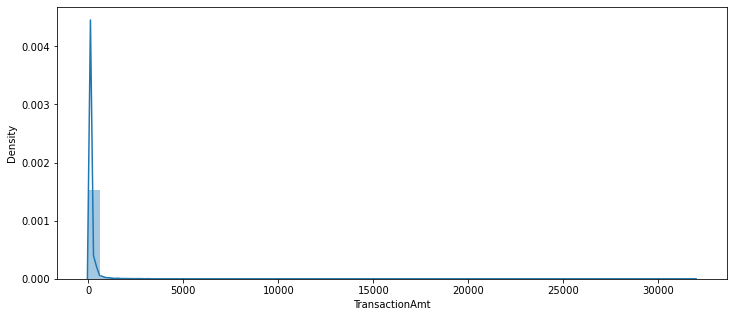

In [26]:
check_distribution(df_trans,'TransactionAmt')

/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


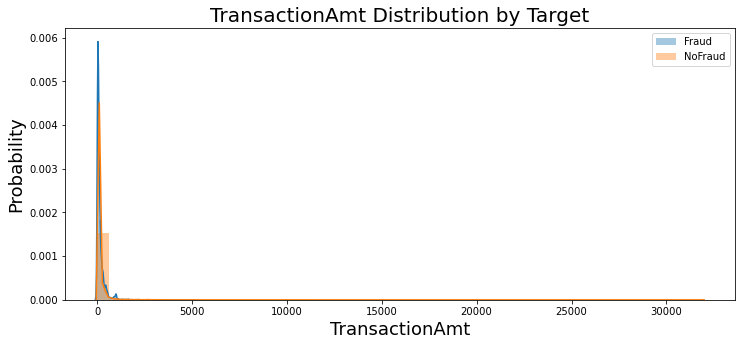

In [27]:
dict= {1:'Fraud',0:'NoFraud'}
compare_distribution(df_trans,'TransactionAmt','isFraud',dict)

In [31]:
df_trans.groupby(['isFraud'])['TransactionAmt'].agg('describe')

count        mean         std    min     25%   50%    75%  \
isFraud                                                                 
0        569877.0  134.511665  239.395078  0.251  43.970  68.5  120.0   
1         20663.0  149.244779  232.212163  0.292  35.044  75.0  161.0   

               max  
isFraud             
0        31937.391  
1         5191.000

count    238269.000000
mean        118.502180
std         371.872026
min           0.000000
25%           3.000000
50%           8.000000
75%          24.000000
max       10286.000000
Name: dist1, dtype: float64
Total missing value number:  352271


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


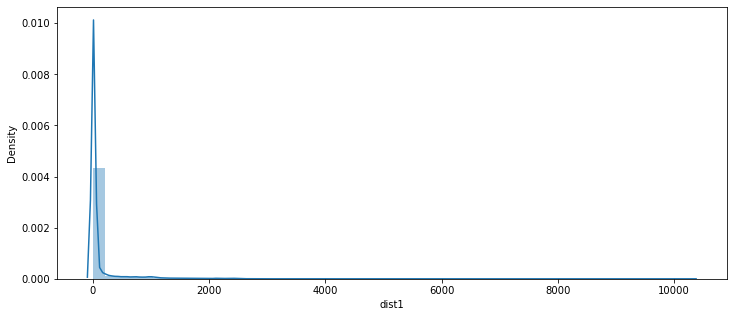

In [32]:
check_distribution(df_trans,'dist1')

/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


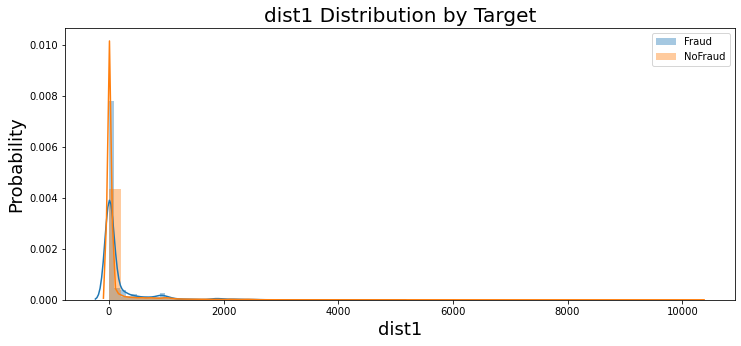

In [33]:
compare_distribution(df_trans,'dist1','isFraud',dict)

# Product CD

In [85]:
print(' {} NA values'.format(df_trans['ProductCD'].isna().sum()))

 0 NA values


  ProductCD   count   sum      mean
0         C   68519  8008  0.116873
1         H   33024  1574  0.047662
2         R   37699  1426  0.037826
3         S   11628   686  0.058996
4         W  439670  8969  0.020399


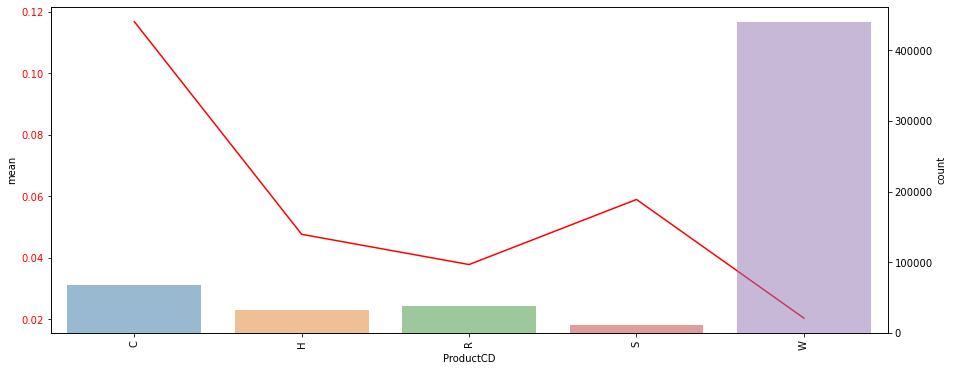

In [34]:
compare_cate(df_trans,'ProductCD','isFraud')

<AxesSubplot:title={'center':'No. of Transactions with Product CD'}>

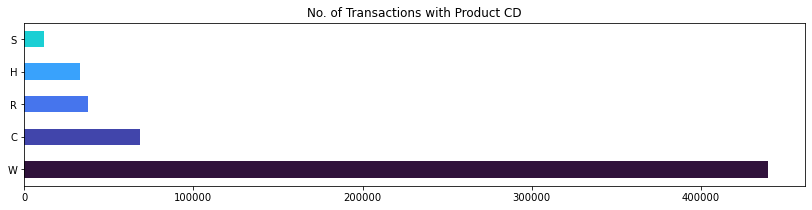

In [35]:
df_trans['ProductCD'].value_counts().plot(
    kind='barh',
    figsize=(14, 3),
    color=px.colors.sequential.Turbo, title='No. of Transactions with Product CD')

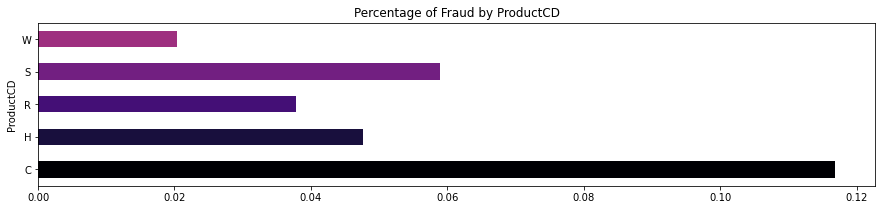

In [36]:
df_trans.groupby('ProductCD')['isFraud'] \
    .mean() \
    .sort_index() \
    .plot(kind='barh',
          figsize=(15, 3),
         title='Percentage of Fraud by ProductCD', 
         color=px.colors.sequential.Magma)
plt.show()

  ProductCD   count           sum        mean
0         C   68519  2.937571e+06   42.872353
1         H   33024  2.416368e+06   73.170058
2         R   37699  6.344975e+06  168.306188
3         S   11628  7.008136e+05   60.269487
4         W  439670  6.733922e+07  153.158554


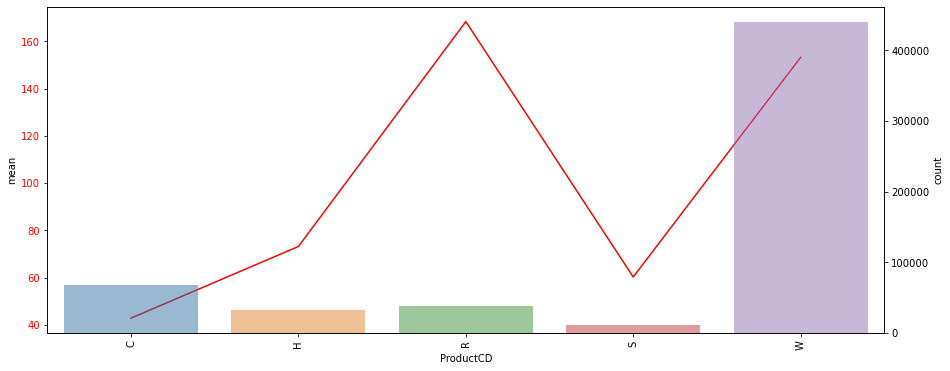

In [37]:
compare_cate(df_trans,'ProductCD','TransactionAmt')

# Categorical Features - Transaction

In [84]:
check_cunique(df_trans,['card1','card2','card3','card4','card5','card6'])

feat  nunique
0  card1    13553
1  card2      500
2  card3      114
3  card4        4
4  card5      119
5  card6        4

In [39]:
check_cunique(df_trans,['card1','card2','card3','card5'])

feat  nunique
0  card1    13553
1  card2      500
2  card3      114
3  card5      119

According to the competition host, card1~card6 are all categorical features. It's a bit odd there are so many unique values of these features.

However it would be normal to think that if card1,card2,card3,card5 info are the same it's the same card. So let's make a cardid variable.

<AxesSubplot:title={'center':'card1'}, ylabel='Frequency'>

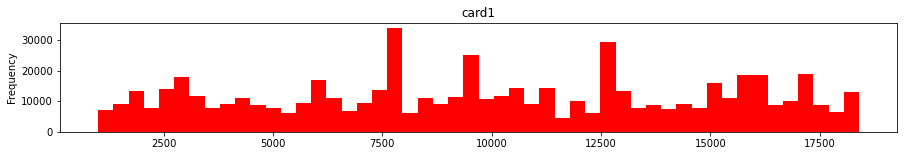

In [40]:
 df_trans['card1'].plot(kind='hist',
                                      title='card1',
                                      bins=50,
                                      figsize=(15, 2),
                                      color='red')

<AxesSubplot:title={'center':'card4'}>

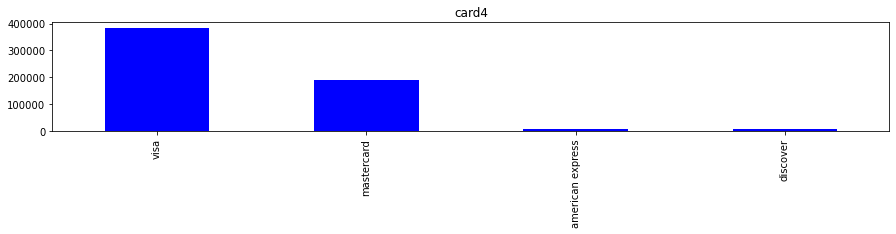

In [41]:
 df_trans['card4'].value_counts().plot(kind='bar',
                                      title='card4',
                                      figsize=(15, 2),
                                      color='blue')

In [42]:
df_trans['card4'].value_counts()

visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

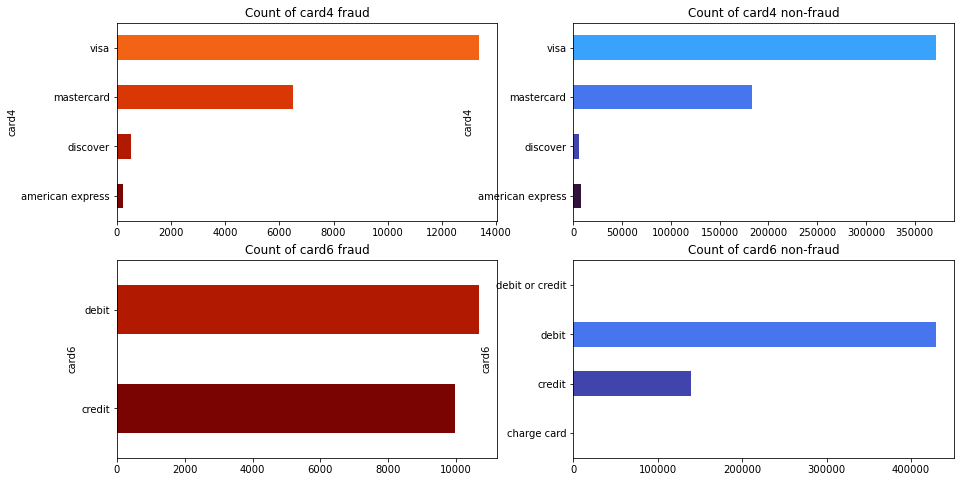

In [43]:
train_transaction_fr = df_trans.loc[df_trans['isFraud'] == 1]
train_transaction_nofr = df_trans.loc[df_trans['isFraud'] == 0]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))
train_transaction_fr.groupby('card4')['card4'].count().plot(
    kind='barh', ax=ax1, title='Count of card4 fraud', color=px.colors.sequential.Turbo_r)
train_transaction_nofr.groupby('card4')['card4'].count().plot(
    kind='barh', ax=ax2, title='Count of card4 non-fraud', color=px.colors.sequential.Turbo)
train_transaction_fr.groupby('card6')['card6'].count().plot(
    kind='barh', ax=ax3, title='Count of card6 fraud', color=px.colors.sequential.Turbo_r)
train_transaction_nofr.groupby('card6')['card6'].count().plot(
    kind='barh', ax=ax4, title='Count of card6 non-fraud', color=px.colors.sequential.Turbo)
plt.show()

              card4   count    sum      mean
0  american express    8328    239  0.028698
1          discover    6651    514  0.077282
2        mastercard  189217   6496  0.034331
3              visa  384767  13373  0.034756


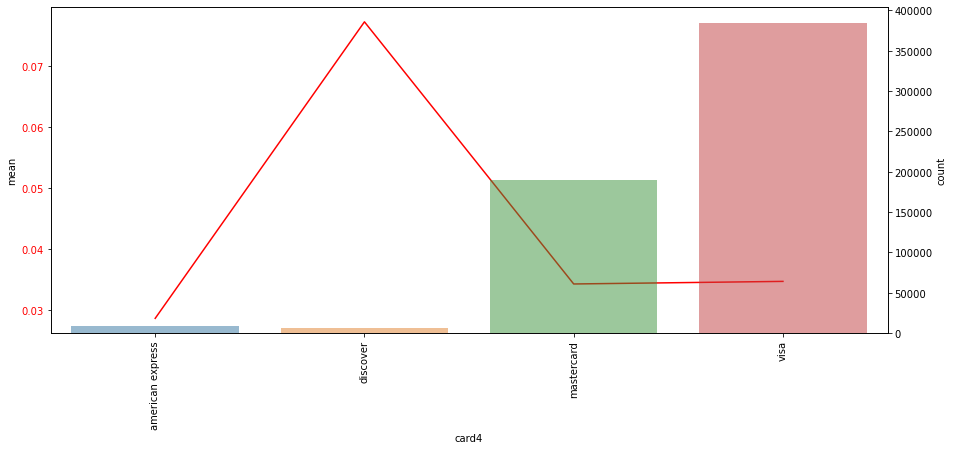

In [44]:
compare_cate(df_trans,'card4','isFraud')

             card6   count    sum      mean
0      charge card      15      0  0.000000
1           credit  148986   9950  0.066785
2            debit  439938  10674  0.024263
3  debit or credit      30      0  0.000000


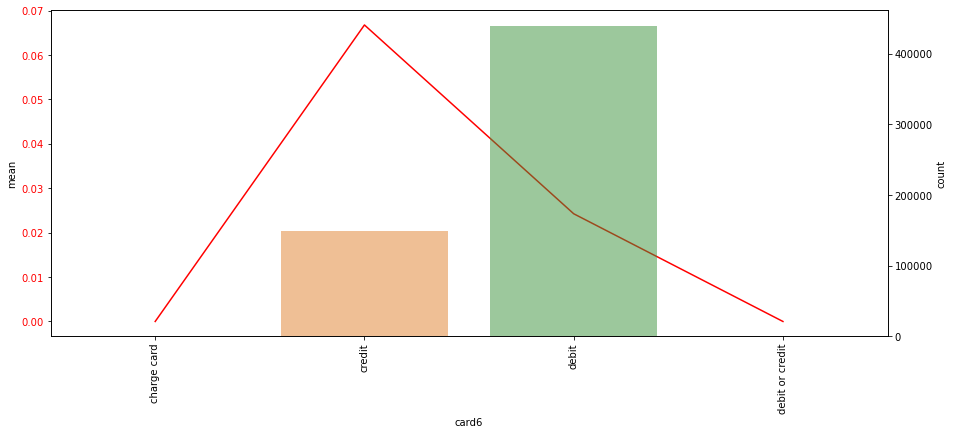

In [45]:
compare_cate(df_trans,'card6','isFraud')

In [46]:
def make_card_id(df):
    cards_cols= ['card1', 'card2', 'card3', 'card5']
    for card in cards_cols: 
        if '1' in card: 
            df['card_id']= df[card].map(str)
        else : 
            df['card_id']+= ' '+df[card].map(str)
    return df['card_id'] 

In [47]:
df_trans['card_id'] = make_card_id(df_trans)

In [48]:
df_trans['card_TAmt_ratio'] = df_trans['TransactionAmt']/df_trans.groupby('card_id')['TransactionAmt'].transform('mean')

   isFraud   count            sum      mean
0        0  569877  566043.514268  0.993273
1        1   20663   24496.485732  1.185524


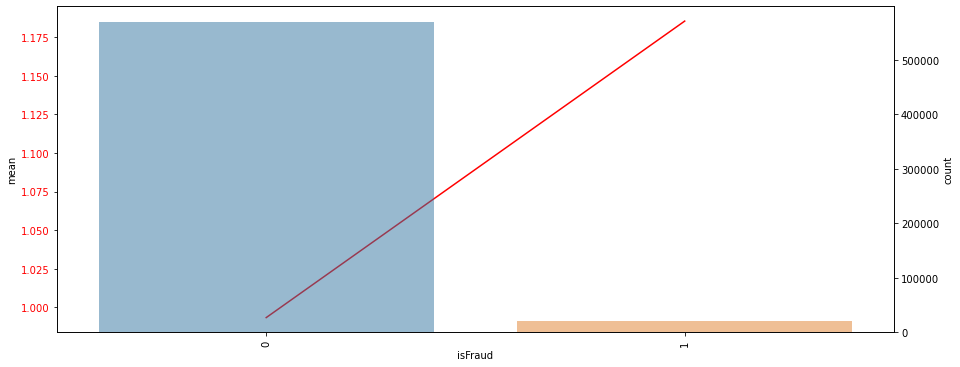

In [49]:
compare_cate(df_trans,'isFraud','card_TAmt_ratio')

# addr1 & addr2

In [86]:
check_cunique(df_trans,['addr1','addr2'])

feat  nunique
0  addr1      332
1  addr2       74

 addr1 - has 65706 NA values
 addr2 - has 65706 NA values


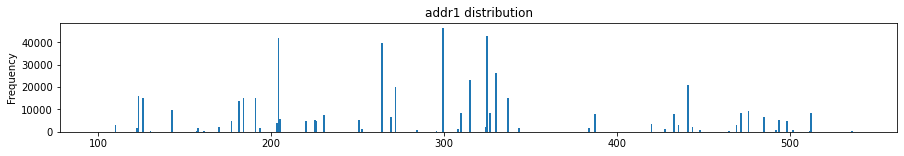

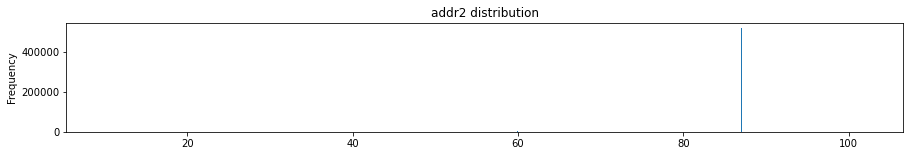

In [50]:
print(' addr1 - has {} NA values'.format(df_trans['addr1'].isna().sum()))
print(' addr2 - has {} NA values'.format(df_trans['addr2'].isna().sum()))

df_trans['addr1'].plot(kind='hist', bins=500, figsize=(15, 2), title='addr1 distribution')
plt.show()
df_trans['addr2'].plot(kind='hist', bins=500, figsize=(15, 2), title='addr2 distribution')
plt.show()

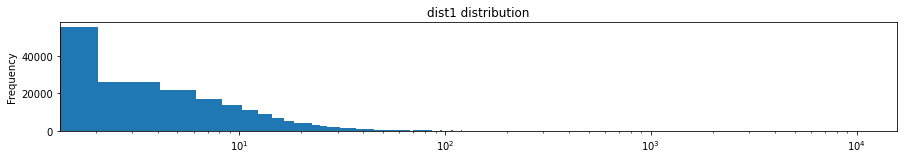

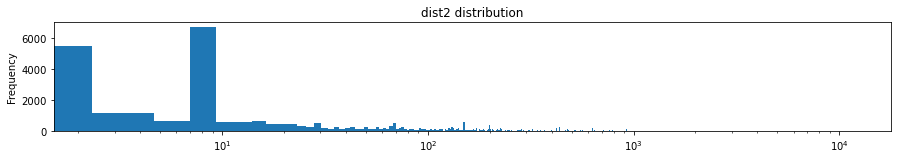

In [51]:
df_trans['dist1'].plot(kind='hist',
                                bins=5000,
                                figsize=(15, 2),
                                title='dist1 distribution',
                                logx=True)
plt.show()
df_trans['dist2'].plot(kind='hist',
                                bins=5000,
                                figsize=(15, 2),
                                title='dist2 distribution',
                                logx=True)
plt.show()

# Domain

       P_emaildomain   count   sum      mean
0            aim.com     315    40  0.126984
1      anonymous.com   36998   859  0.023217
2            aol.com   28289   617  0.021811
3            att.net    4033    30  0.007439
4      bellsouth.net    1909    53  0.027763
5       cableone.net     159     3  0.018868
6    centurylink.net     205     0  0.000000
7         cfl.rr.com     172     0  0.000000
8        charter.net     816    25  0.030637
9        comcast.net    7888   246  0.031187
10           cox.net    1393    29  0.020818
11     earthlink.net     514    11  0.021401
12    embarqmail.com     260     9  0.034615
13      frontier.com     280     8  0.028571
14   frontiernet.net     195     5  0.025641
15             gmail     496    11  0.022177
16         gmail.com  228355  9943  0.043542
17            gmx.de     149     0  0.000000
18     hotmail.co.uk     112     0  0.000000
19       hotmail.com   45250  2396  0.052950
20        hotmail.de      43     0  0.000000
21        

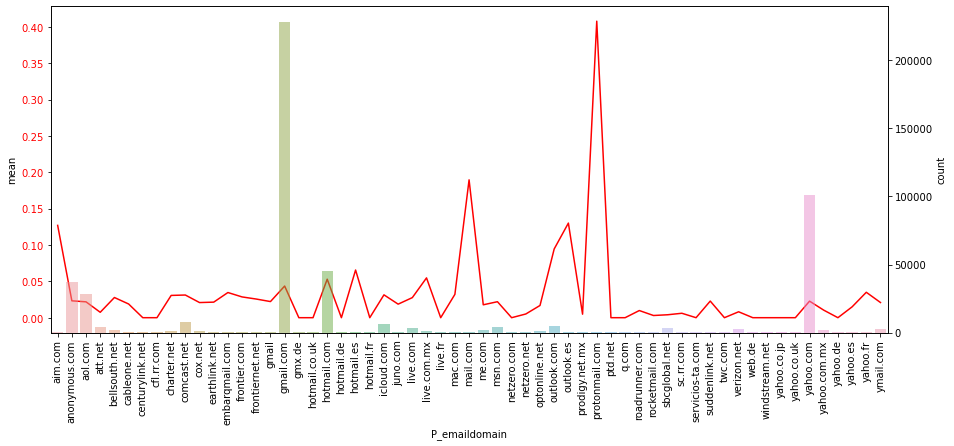

In [52]:
compare_cate(df_trans,'P_emaildomain','isFraud')

We can also make a categorical feature with all the extensions of the domain like .com | .net etc

       R_emaildomain  count   sum      mean
0            aim.com     36     1  0.027778
1      anonymous.com  20529   598  0.029130
2            aol.com   3701   129  0.034855
3            att.net    430     0  0.000000
4      bellsouth.net    422     2  0.004739
5       cableone.net     27     0  0.000000
6    centurylink.net     12     0  0.000000
7         cfl.rr.com     37     0  0.000000
8        charter.net    127     5  0.039370
9        comcast.net   1812    21  0.011589
10           cox.net    459    11  0.023965
11     earthlink.net     79     6  0.075949
12    embarqmail.com     68     0  0.000000
13      frontier.com     52     0  0.000000
14   frontiernet.net     14     0  0.000000
15             gmail     95     0  0.000000
16         gmail.com  57147  6811  0.119184
17            gmx.de    147     0  0.000000
18     hotmail.co.uk    105     0  0.000000
19       hotmail.com  27509  2140  0.077793
20        hotmail.de     42     0  0.000000
21        hotmail.es    292    2

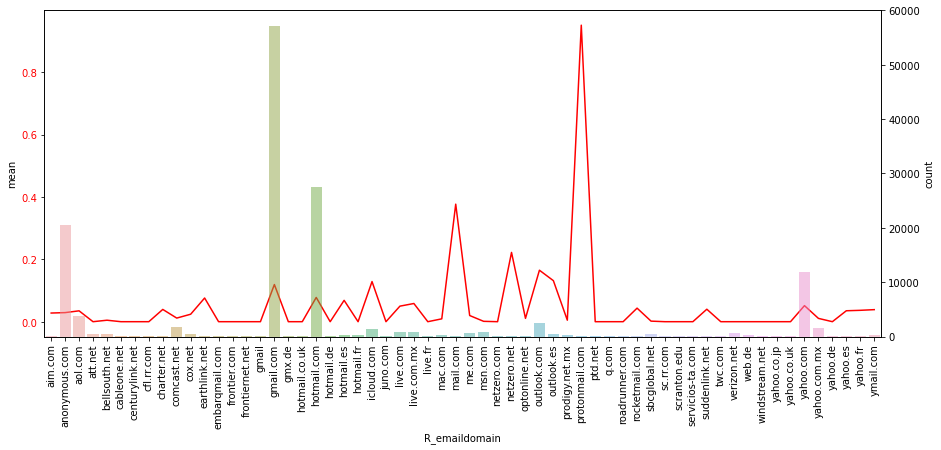

In [53]:
compare_cate(df_trans,'R_emaildomain','isFraud')

<AxesSubplot:title={'center':'No. of Transactions on a service'}>

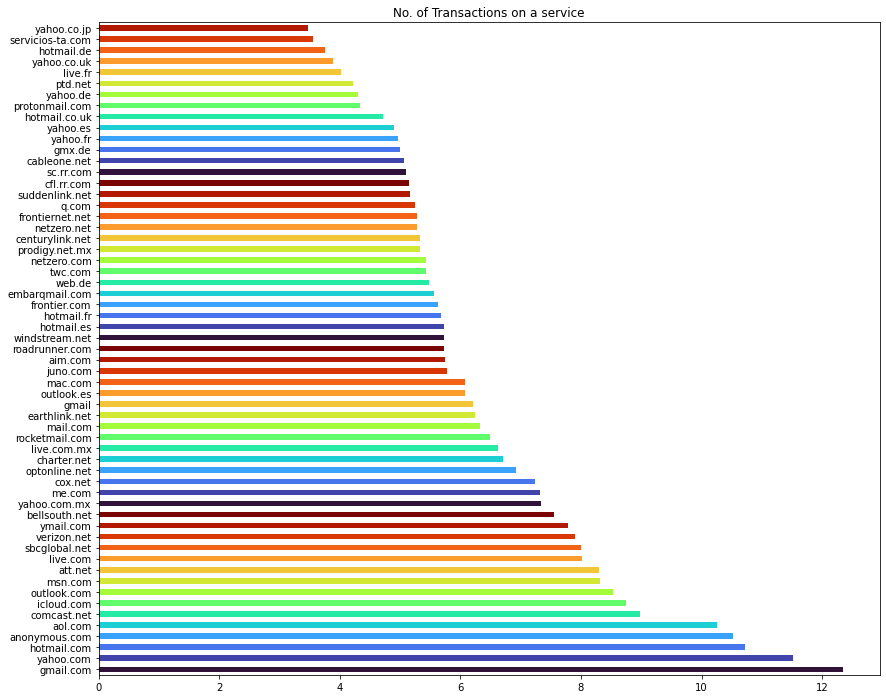

In [54]:
df_trans['P_emaildomain'].value_counts().apply(np.log).plot(
    kind='barh',
    figsize=(14, 12),
    color=px.colors.sequential.Turbo, title='No. of Transactions on a service')

# C1 - C14
Because we are provided many numerical columns, we can create a pairplot to plot feature interactions. I know these plots can be hard to read, but it is helpful for gaining intution about potential feature interactions and if certain features have more variance than others.

In [55]:
c_cols = [c for c in df_trans if c[0] == 'C']
df_trans[c_cols].head()

C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12   C13  C14
0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  2.0  0.0   1.0  1.0
1  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   1.0  1.0
2  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   1.0  1.0
3  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0  0.0  1.0  0.0  25.0  1.0
4  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0   1.0  1.0

/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


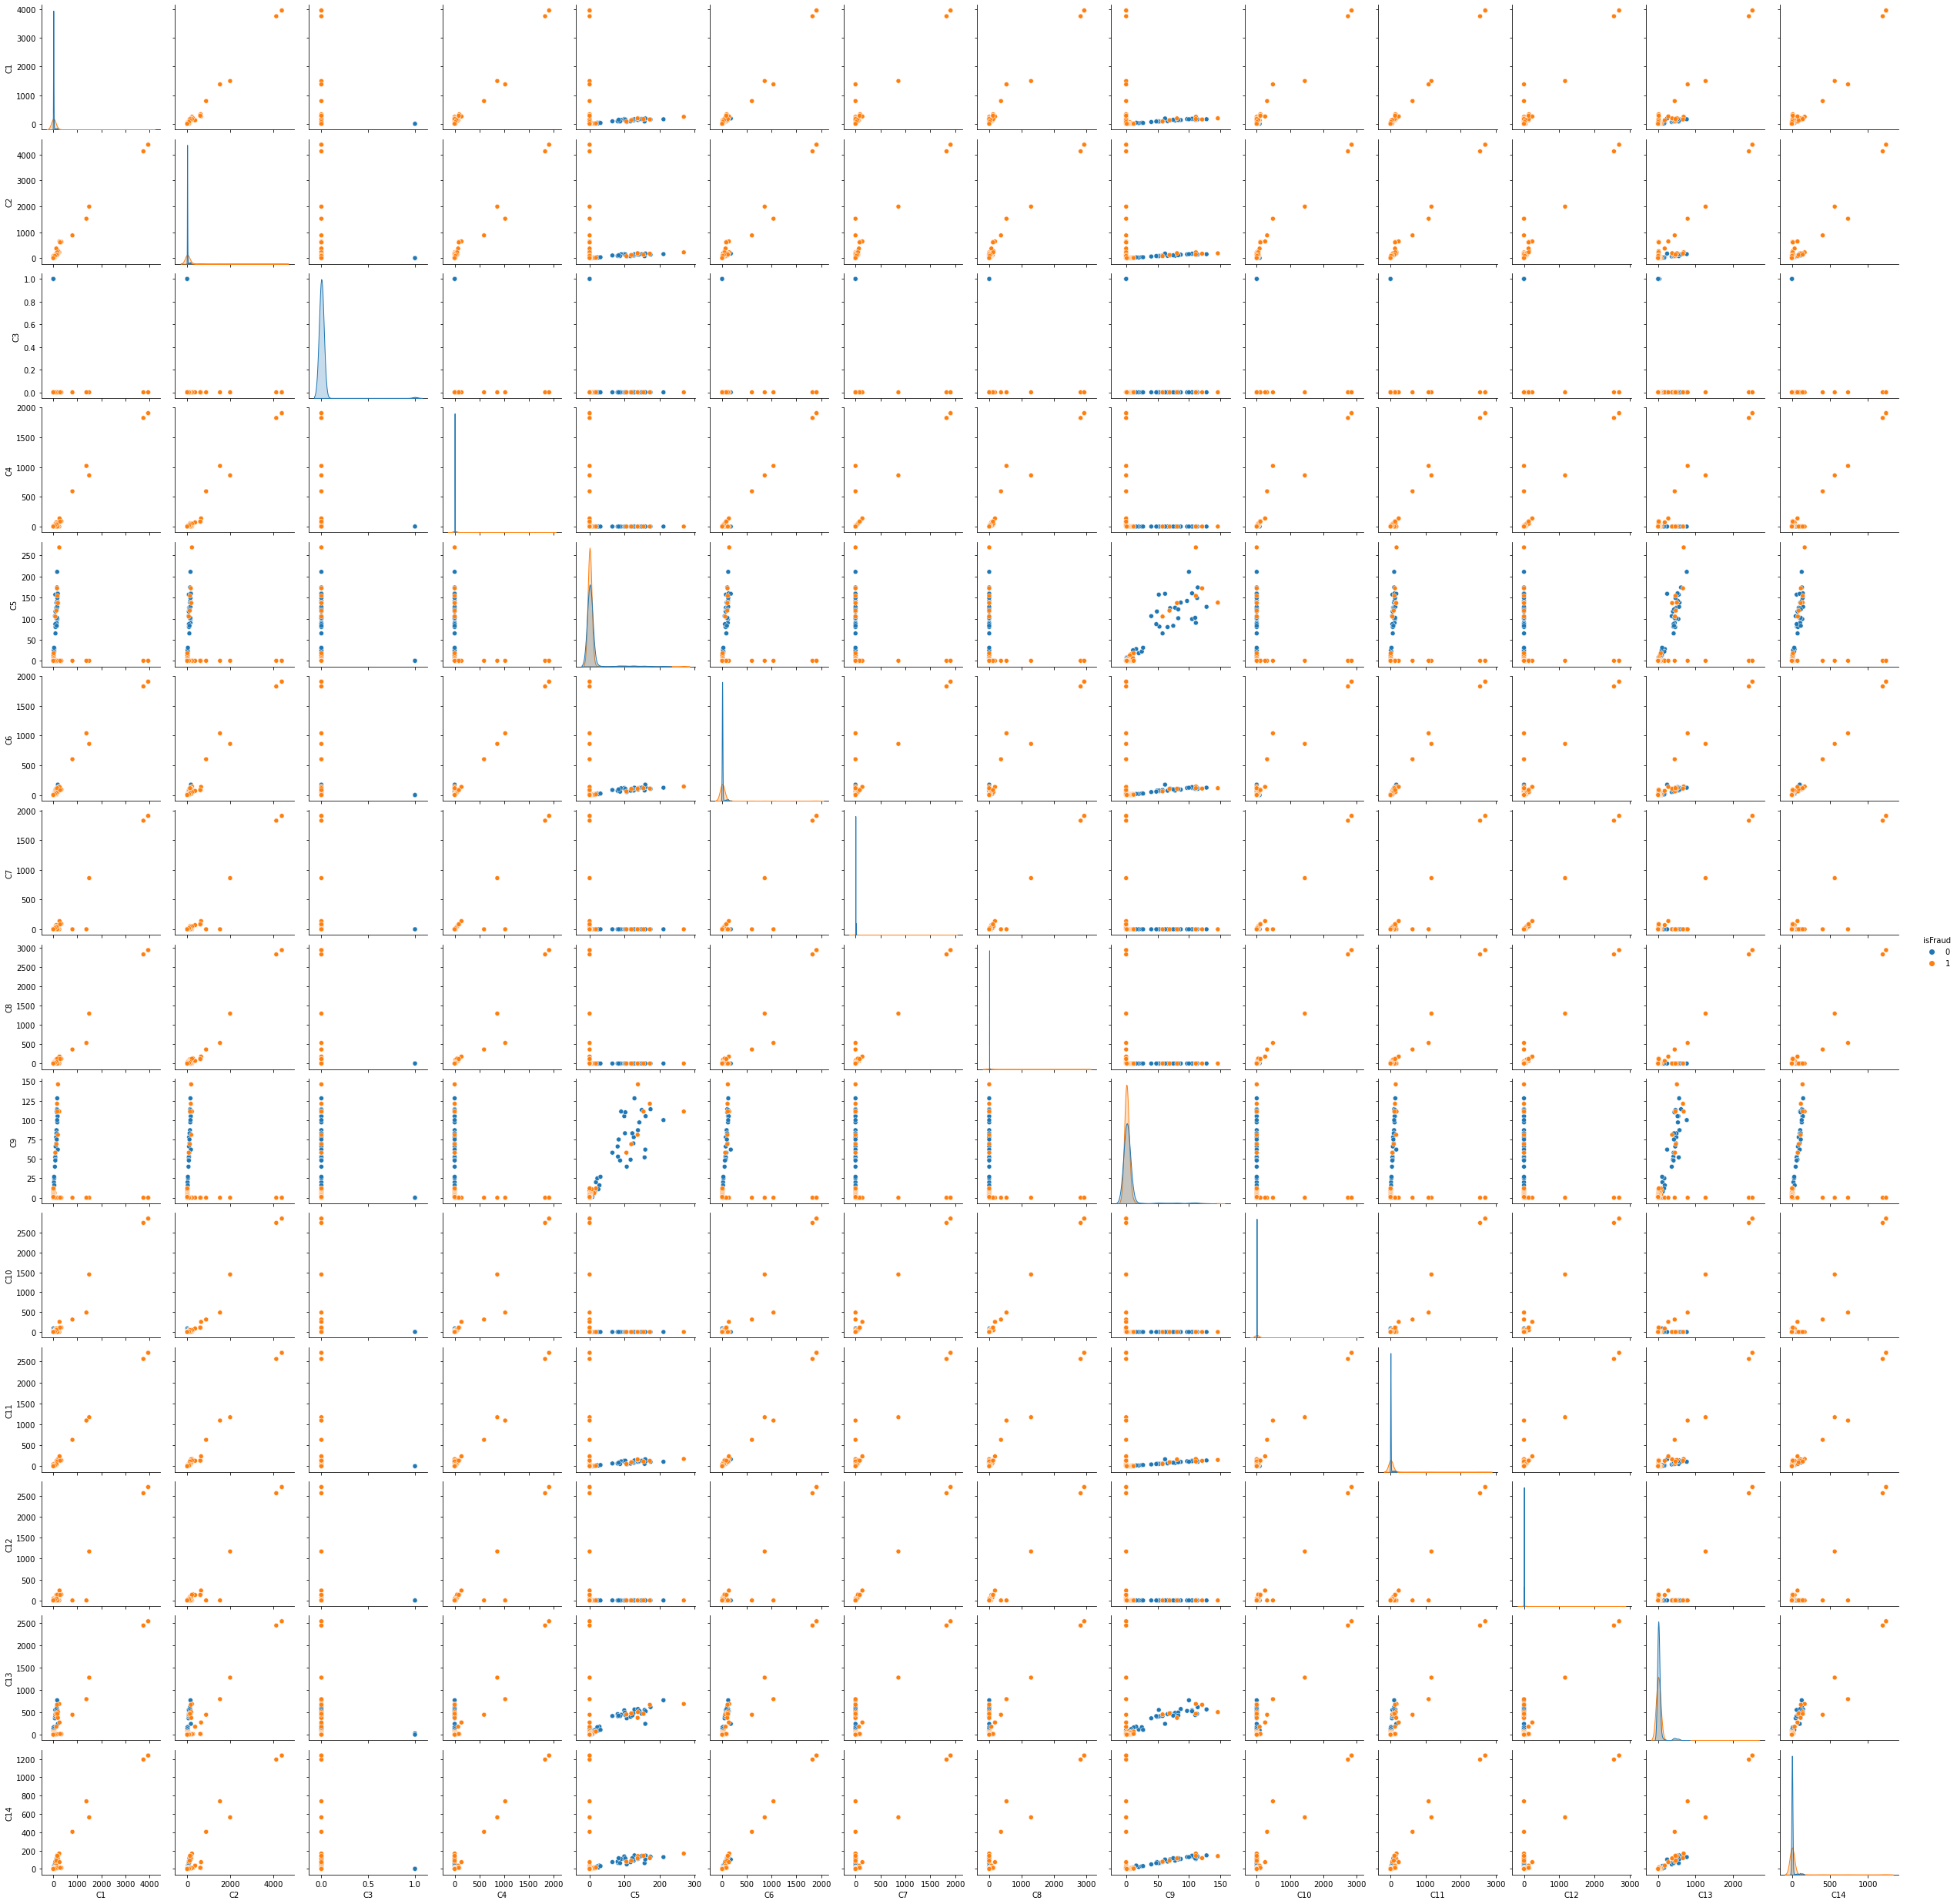

In [40]:
# Sample 500 fraud and 500 non-fraud examples to plot
sampled_train = pd.concat([df_trans.loc[df_trans['isFraud'] == 0].sample(500),
          df_trans.loc[df_trans['isFraud'] == 1].sample(500)])

sns.pairplot(sampled_train, 
             hue='isFraud',
            vars=c_cols)
plt.show()

            count       mean         std  min  25%  50%  75%     max
isFraud                                                             
0        569877.0  13.314952  127.787969  0.0  1.0  1.0  3.0  4685.0
1         20663.0  35.535740  242.976260  0.0  1.0  2.0  6.0  4682.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


            count       mean         std  min  25%  50%  75%     max
isFraud                                                             
0        569877.0  14.173283  147.485925  0.0  1.0  1.0  3.0  5691.0
1         20663.0  45.509413  287.813648  0.0  1.0  2.0  7.0  5690.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


            count      mean       std  min  25%  50%  75%   max
isFraud                                                        
0        569877.0  0.005840  0.153208  0.0  0.0  0.0  0.0  26.0
1         20663.0  0.000242  0.015554  0.0  0.0  0.0  0.0   1.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


            count       mean         std  min  25%  50%  75%     max
isFraud                                                             
0        569877.0   3.693878   65.839255  0.0  0.0  0.0  0.0  2253.0
1         20663.0  15.077336  125.673738  0.0  0.0  1.0  2.0  2251.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


            count      mean        std  min  25%  50%  75%    max
isFraud                                                          
0        569877.0  5.722537  26.121841  0.0  0.0  0.0  1.0  349.0
1         20663.0  1.406717  12.946092  0.0  0.0  0.0  0.0  331.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


            count       mean         std  min  25%  50%  75%     max
isFraud                                                             
0        569877.0   8.786377   68.689176  0.0  1.0  1.0  2.0  2253.0
1         20663.0  16.923148  126.298758  0.0  1.0  1.0  3.0  2251.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


            count       mean         std  min  25%  50%  75%     max
isFraud                                                             
0        569877.0   2.517484   58.860773  0.0  0.0  0.0  0.0  2255.0
1         20663.0  11.977157  115.143177  0.0  0.0  0.0  1.0  2253.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


            count       mean         std  min  25%  50%  75%     max
isFraud                                                             
0        569877.0   4.560881   91.023016  0.0  0.0  0.0  0.0  3331.0
1         20663.0  21.242608  176.695771  0.0  0.0  1.0  2.0  3328.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


            count      mean        std  min  25%  50%  75%    max
isFraud                                                          
0        569877.0  4.580904  16.889451  0.0  0.0  1.0  2.0  210.0
1         20663.0  1.703964   8.453280  0.0  0.0  0.0  1.0  192.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


            count       mean         std  min  25%  50%  75%     max
isFraud                                                             
0        569877.0   4.723526   91.239098  0.0  0.0  0.0  0.0  3257.0
1         20663.0  19.493926  176.919186  0.0  0.0  1.0  2.0  3254.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


            count       mean         std  min  25%  50%  75%     max
isFraud                                                             
0        569877.0   9.747825   90.306569  0.0  1.0  1.0  2.0  3188.0
1         20663.0  23.857475  170.966234  0.0  1.0  2.0  4.0  3186.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


            count       mean         std  min  25%  50%  75%     max
isFraud                                                             
0        569877.0   3.549703   82.601169  0.0  0.0  0.0  0.0  3188.0
1         20663.0  18.597541  162.082460  0.0  0.0  0.0  2.0  3186.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


            count       mean         std  min  25%  50%   75%     max
isFraud                                                              
0        569877.0  32.814474  127.832166  0.0  1.0  3.0  13.0  2918.0
1         20663.0  24.967768  165.979050  0.0  1.0  1.0   6.0  2915.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


            count       mean        std  min  25%  50%  75%     max
isFraud                                                            
0        569877.0   8.220491  47.898725  0.0  1.0  1.0  2.0  1429.0
1         20663.0  10.356047  82.902579  0.0  0.0  1.0  2.0  1426.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


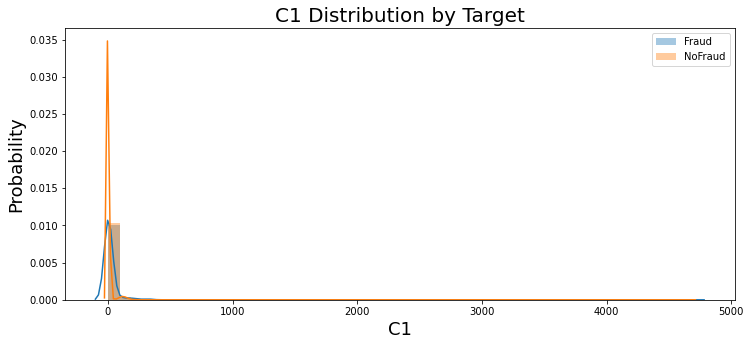

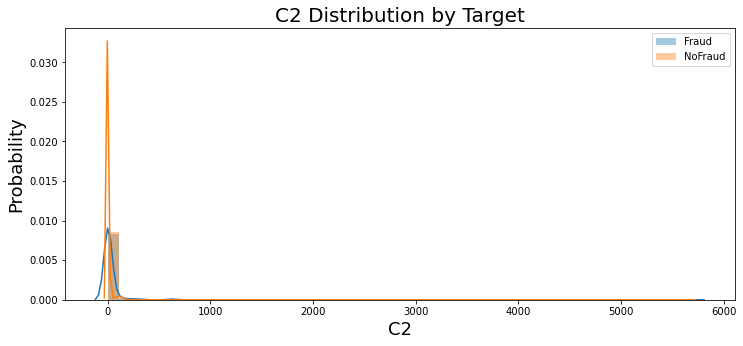

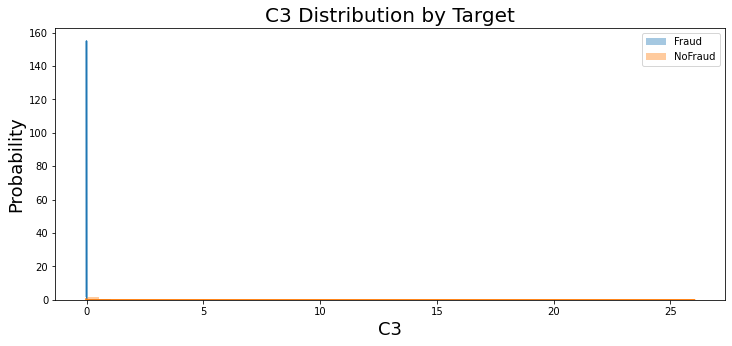

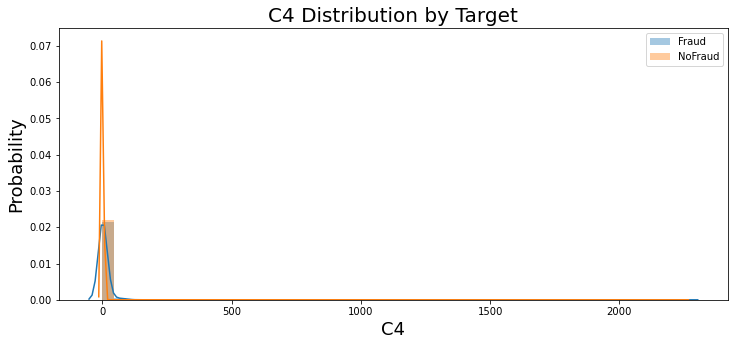

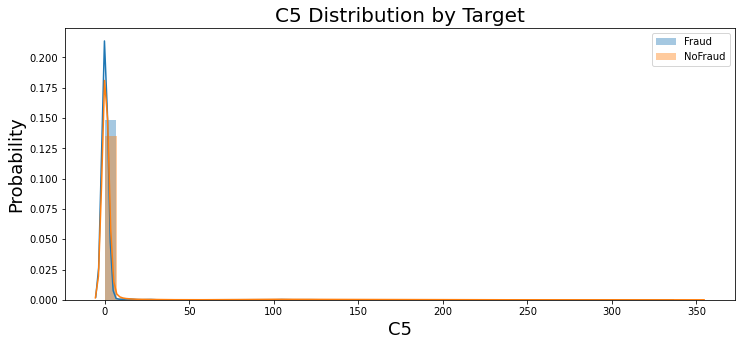

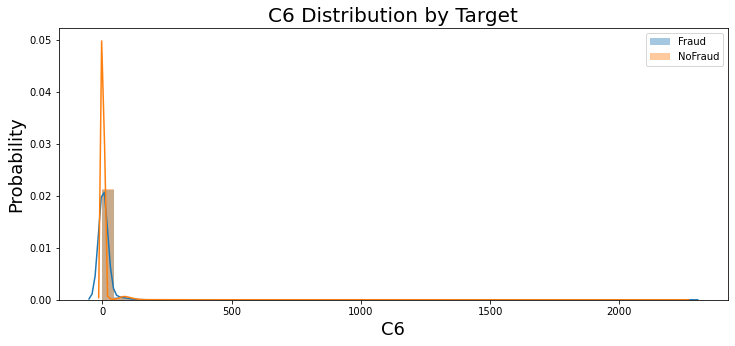

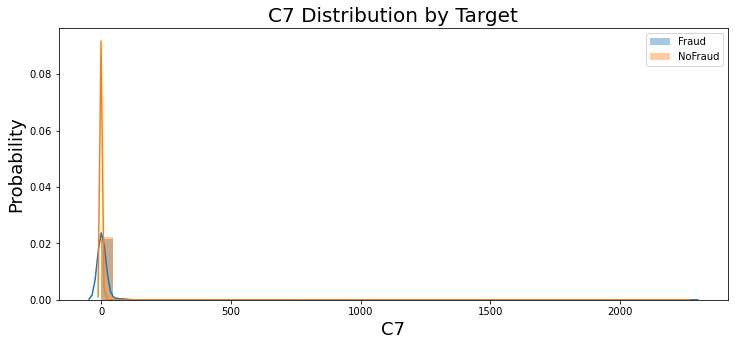

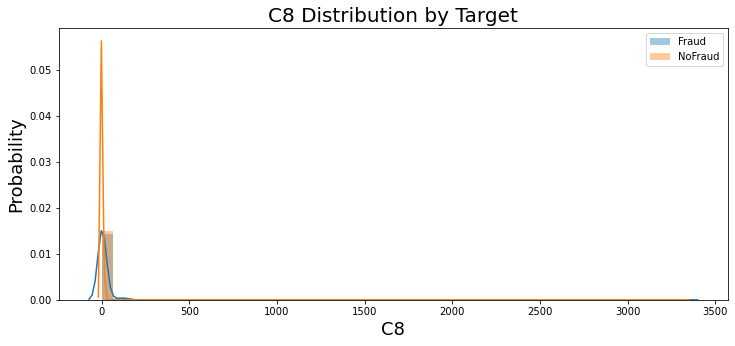

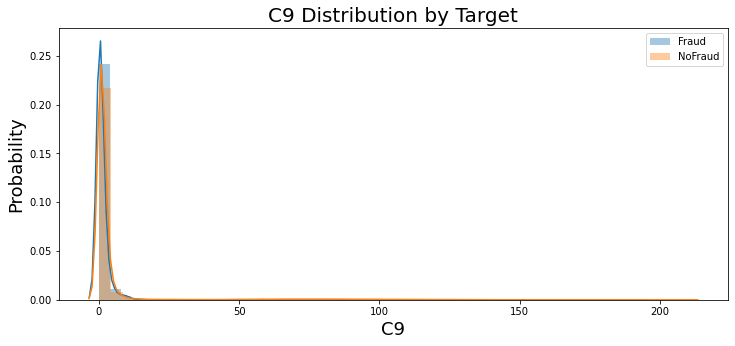

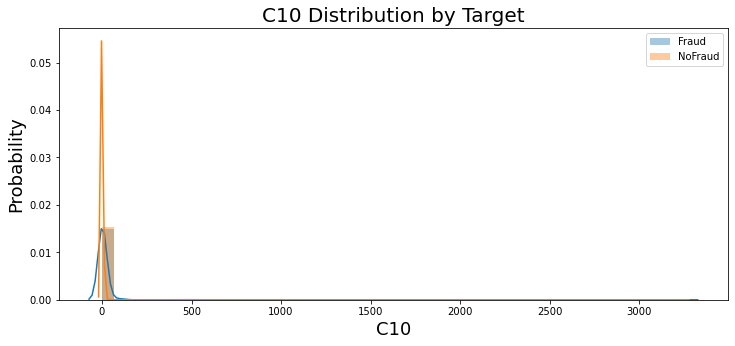

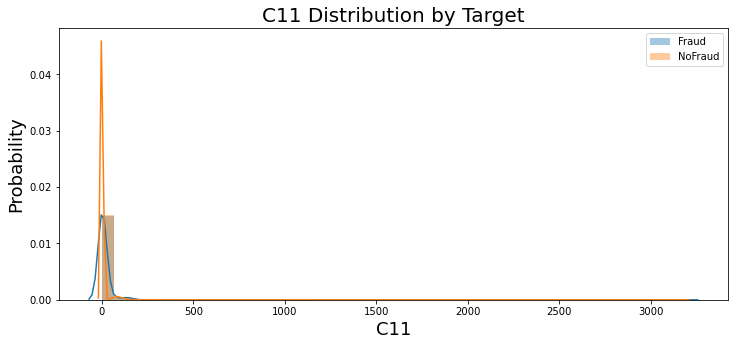

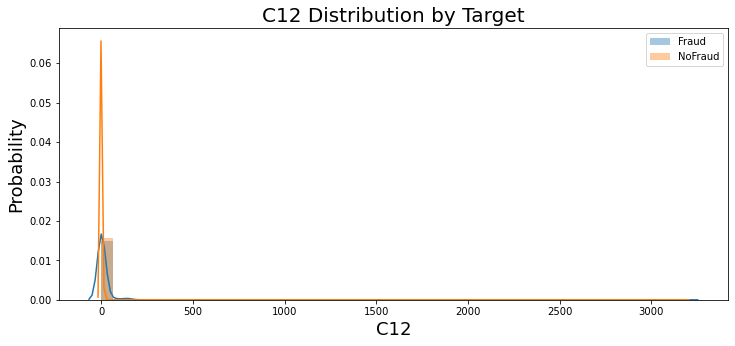

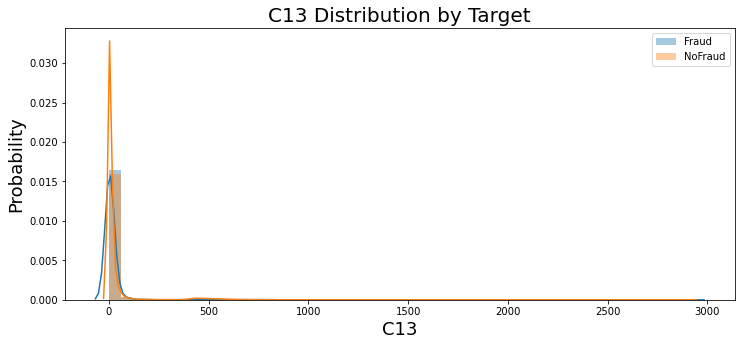

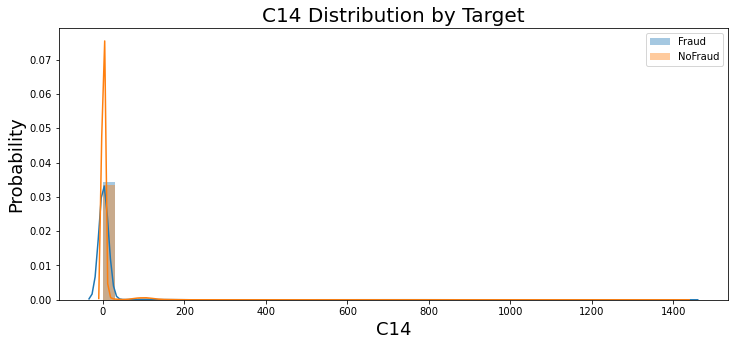

In [57]:
for i in range(0,14):
    col = 'C%s'%(i+1)
    print(df_trans.groupby(['isFraud'])[col].agg('describe'))
    compare_distribution(df_trans,col,'isFraud',dict)

# D1-D9
Similarly for features D1-D9. In these plots we can see some linear and non-linear interactions between features. We may want to create additional features using these interactions if we think it would help our model better find relationship between fraud and non-fraud observations.

In [88]:
d_cols = [c for c in df_trans if c[0] == 'D']
df_trans[d_cols].head()

D1     D2    D3    D4   D5  D6  D7  D8  D9   D10    D11  D12  D13  D14  \
0   14.0    NaN  13.0   NaN  NaN NaN NaN NaN NaN  13.0   13.0  NaN  NaN  NaN   
1    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   0.0    NaN  NaN  NaN  NaN   
2    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   0.0  315.0  NaN  NaN  NaN   
3  112.0  112.0   0.0  94.0  0.0 NaN NaN NaN NaN  84.0    NaN  NaN  NaN  NaN   
4    0.0    NaN   NaN   NaN  NaN NaN NaN NaN NaN   NaN    NaN  NaN  NaN  NaN   

     D15  
0    0.0  
1    0.0  
2  315.0  
3  111.0  
4    NaN

In [90]:
df_trans['D1'].value_counts()

0.0      280130
1.0        8634
2.0        4969
3.0        3954
4.0        3570
          ...  
621.0       109
619.0       107
638.0        79
639.0        42
640.0        14
Name: D1, Length: 641, dtype: int64

In [91]:
d_cols

['D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15']

In [89]:
check_cunique(df_trans,d_cols)

feat  nunique
0    D1      641
1    D2      641
2    D3      649
3    D4      808
4    D5      688
5    D6      829
6    D7      597
7    D8    12353
8    D9       24
9   D10      818
10  D11      676
11  D12      635
12  D13      577
13  D14      802
14  D15      859

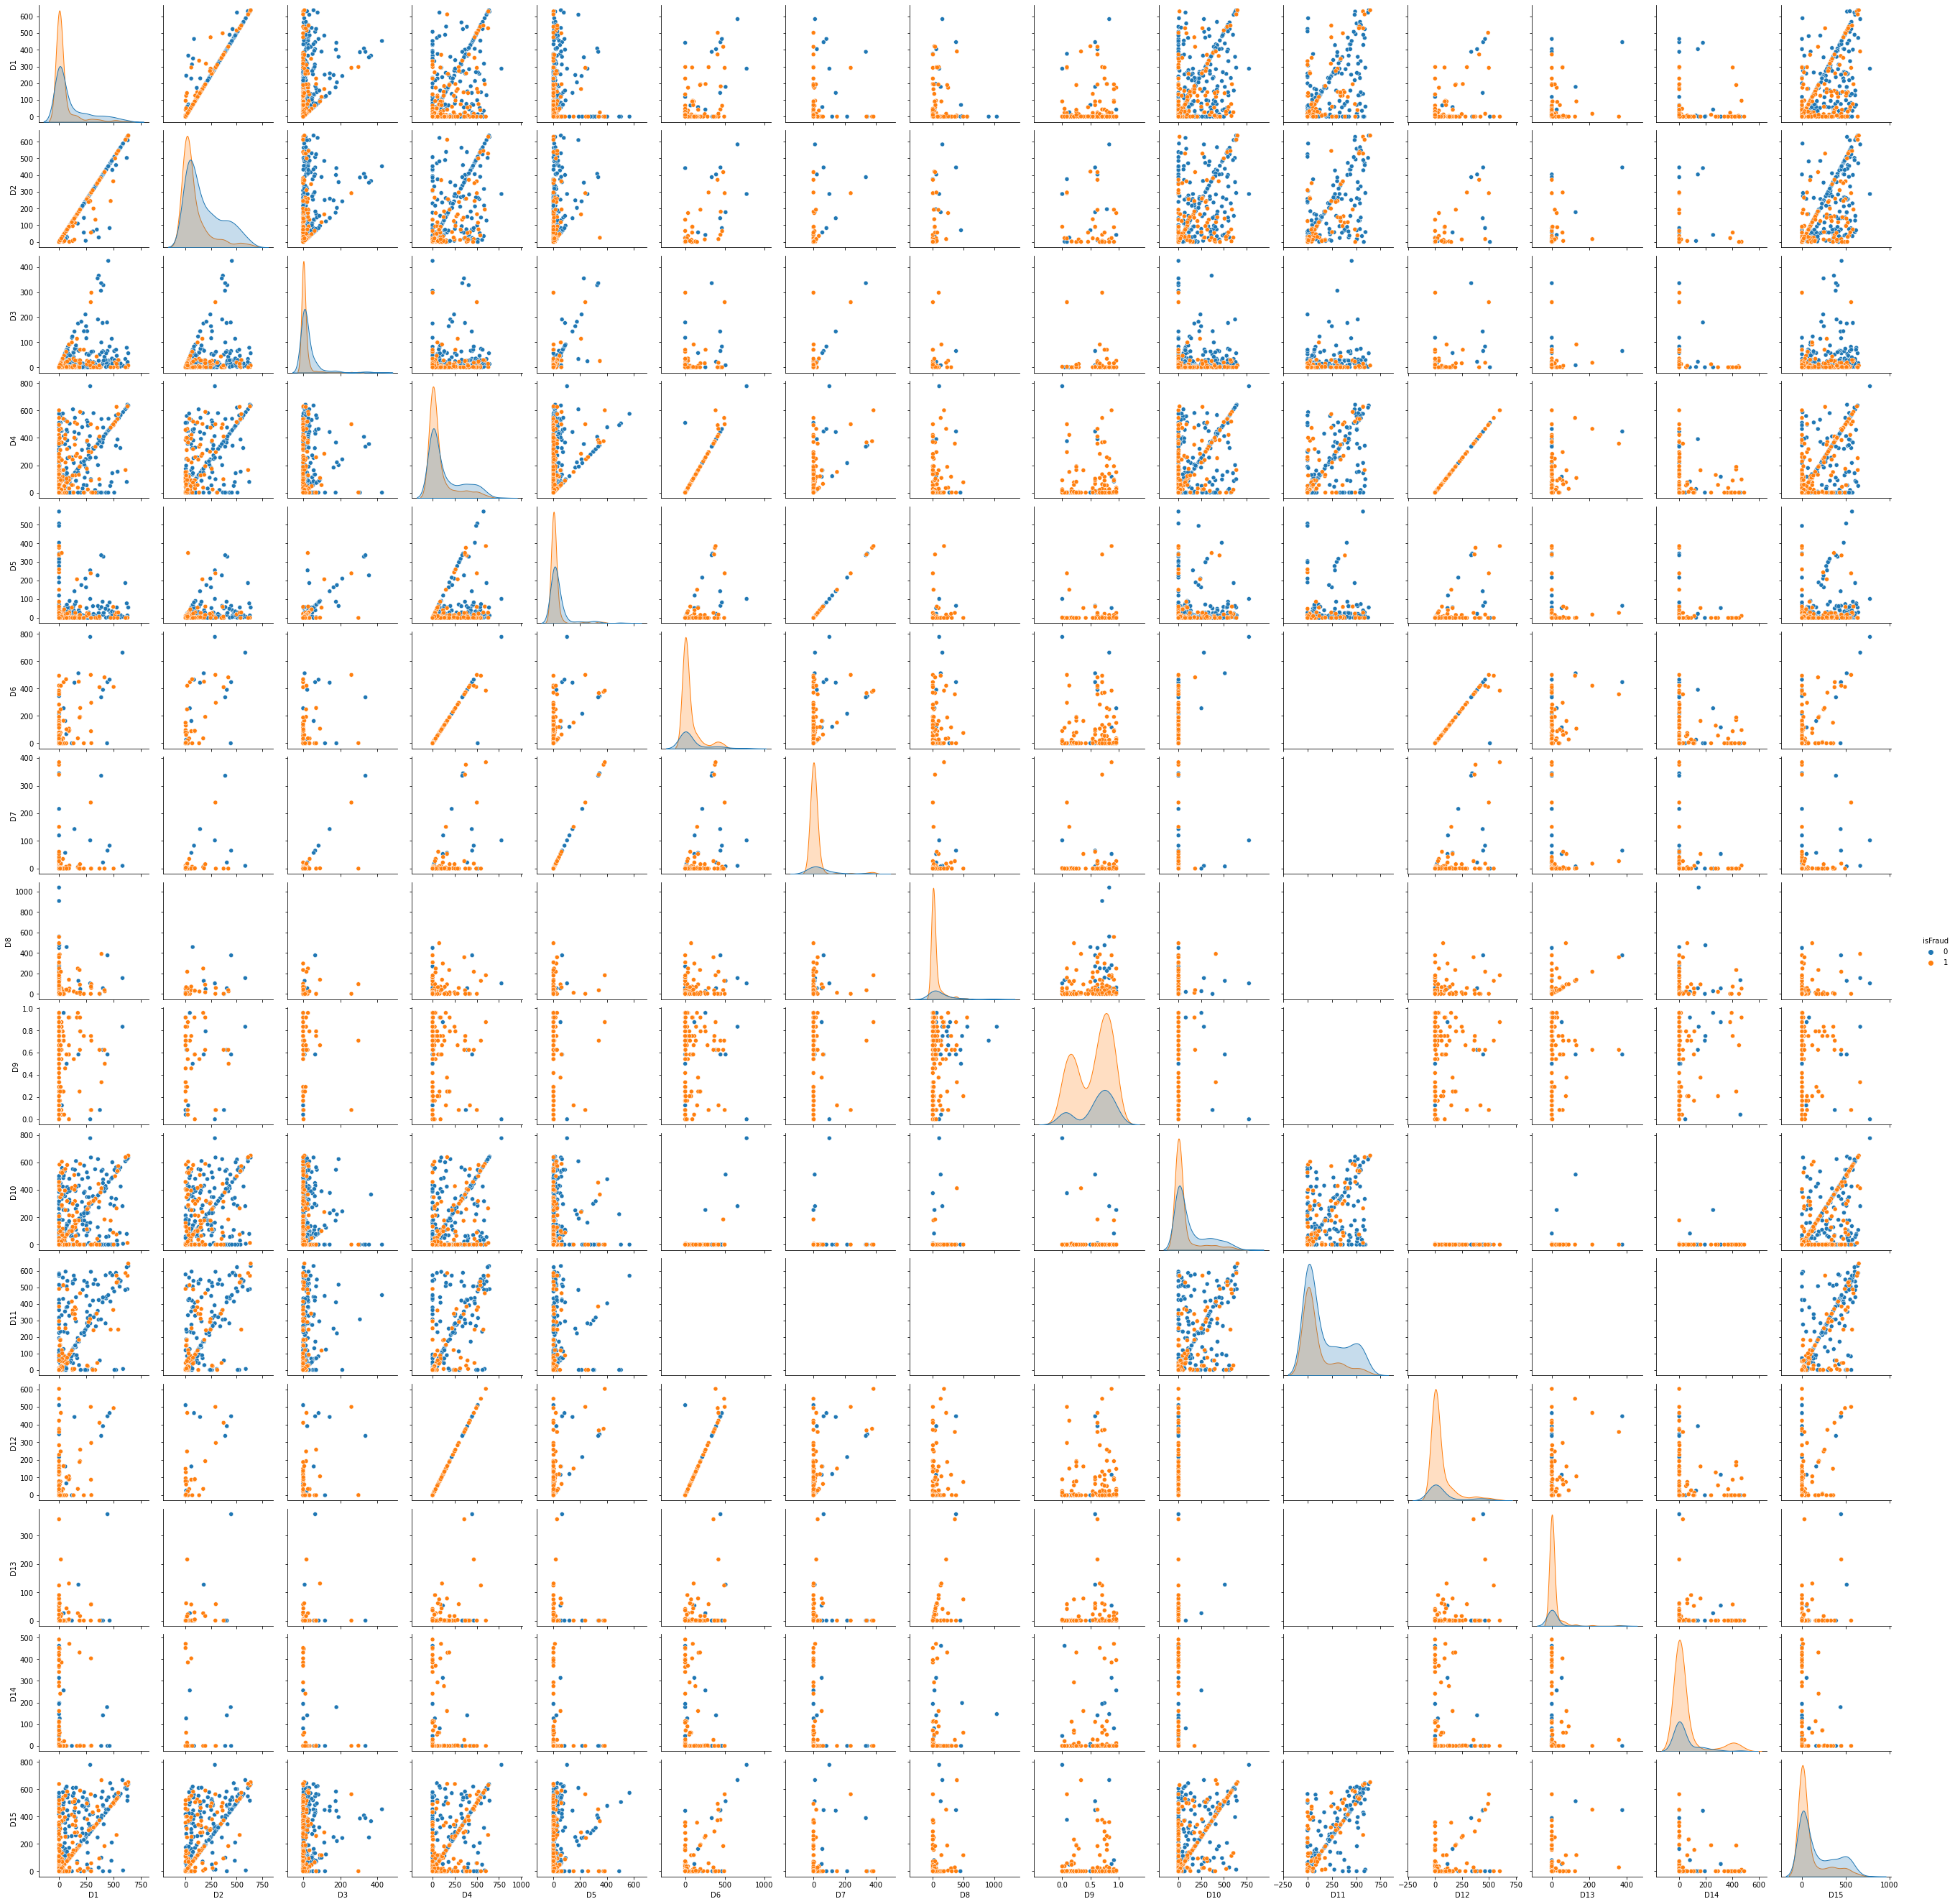

In [42]:
sns.pairplot(sampled_train,
             hue='isFraud',
             vars=d_cols)
plt.show()

            count       mean         std  min  25%  50%    75%    max
isFraud                                                              
0        568654.0  96.364705  158.973258  0.0  0.0  4.0  126.0  640.0
1         20617.0  38.711306  100.915599  0.0  0.0  0.0   14.0  637.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


            count        mean         std  min   25%    50%    75%    max
isFraud                                                                  
0        301873.0  171.956223  177.773639  0.0  27.0  100.0  280.0  640.0
1          7870.0   77.774206  128.697847  0.0   2.0   16.0   95.0  637.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


            count       mean        std  min  25%  50%   75%    max
isFraud                                                            
0        318043.0  28.845357  62.830058  0.0  1.0  8.0  28.0  819.0
1          9619.0  11.744880  42.005468  0.0  0.0  1.0   5.0  582.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


            count        mean         std    min  25%   50%    75%    max
isFraud                                                                  
0        407051.0  142.432339  192.213375 -122.0  0.0  28.0  261.0  869.0
1         14567.0   72.102904  140.656090    0.0  0.0   1.0   61.0  667.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


            count       mean        std  min  25%   50%   75%    max
isFraud                                                             
0        269819.0  43.491155  89.985719  0.0  1.0  10.0  34.0  819.0
1         10880.0  13.687776  51.891635  0.0  0.0   0.0   3.0  625.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


           count       mean         std   min  25%  50%   75%    max
isFraud                                                             
0        65469.0  72.629046  147.600963 -83.0  0.0  0.0  43.0  873.0
1         7718.0  45.856439  101.424445   0.0  0.0  0.0  24.0  694.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


           count       mean         std  min  25%  50%   75%    max
isFraud                                                            
0        33127.0  46.943007  105.435756  0.0  0.0  0.0  24.0  843.0
1         5790.0  11.292228   46.743057  0.0  0.0  0.0   0.0  547.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


           count        mean         std  min   25%        50%         75%  \
isFraud                                                                      
0        67099.0  157.343727  237.987816  0.0  1.75  50.583332  207.541672   
1         7827.0   49.309191  133.254994  0.0  0.75   2.666666   32.375000   

                 max  
isFraud               
0        1707.791626  
1        1290.583374  


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


           count      mean       std  min       25%       50%       75%  \
isFraud                                                                   
0        67099.0  0.565846  0.314576  0.0  0.208333  0.666666  0.833333   
1         7827.0  0.520000  0.333188  0.0  0.166666  0.625000  0.833333   

              max  
isFraud            
0        0.958333  
1        0.958333  


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


            count        mean         std  min  25%   50%    75%    max
isFraud                                                                
0        497741.0  126.396130  183.710646  0.0  0.0  18.0  205.0  876.0
1         16777.0   52.363653  127.051078  0.0  0.0   0.0   14.0  664.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


            count        mean         std   min  25%   50%     75%    max
isFraud                                                                  
0        305147.0  147.808201  186.555365 -53.0  0.0  44.0  277.00  670.0
1          6106.0   87.314445  146.561013   0.0  0.0   7.0  107.75  655.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


           count       mean         std   min  25%  50%   75%    max
isFraud                                                             
0        57119.0  55.345787  127.166079 -83.0  0.0  0.0  11.0  648.0
1         7598.0  44.202553   99.349394   0.0  0.0  0.0  22.0  602.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


           count       mean        std  min  25%  50%  75%    max
isFraud                                                          
0        55115.0  19.316574  70.703174  0.0  0.0  0.0  0.0  847.0
1         6837.0   6.492321  31.330429  0.0  0.0  0.0  0.0  745.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


           count       mean         std    min  25%  50%  75%    max
isFraud                                                             
0        54974.0  58.152163  137.532930 -193.0  0.0  0.0  1.0  878.0
1         7213.0  54.464578  126.586127    0.0  0.0  0.0  9.0  847.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


            count        mean         std   min  25%   50%    75%    max
isFraud                                                                 
0        485040.0  166.633142  203.595694 -83.0  0.0  56.0  321.0  879.0
1         16387.0   78.245805  151.956762   0.0  0.0   1.0   63.0  835.0


/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


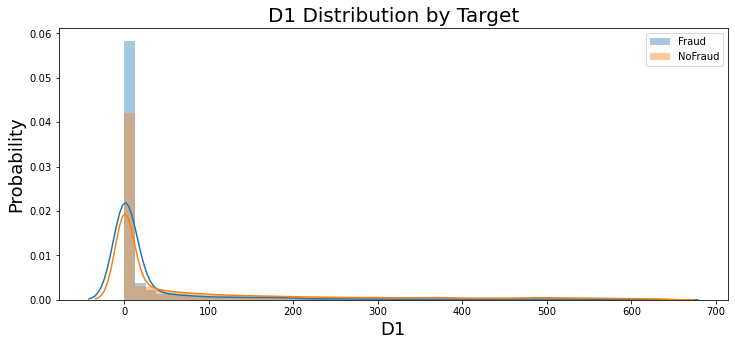

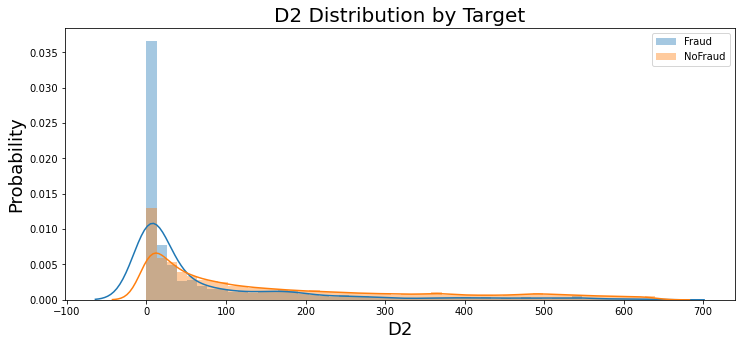

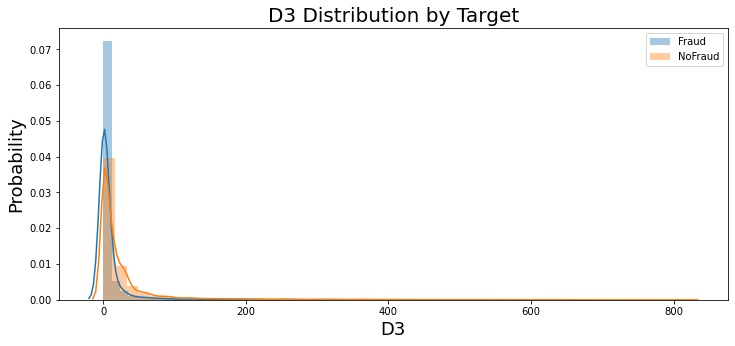

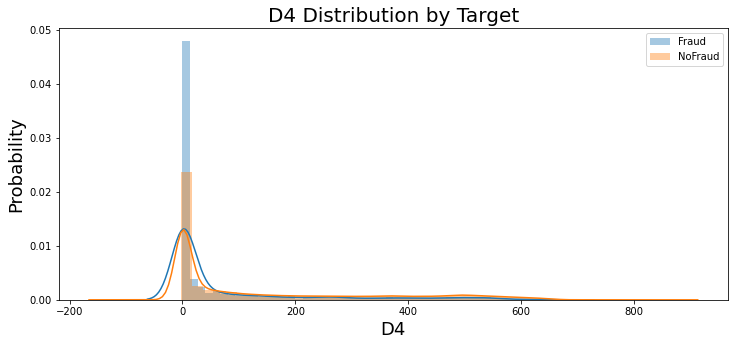

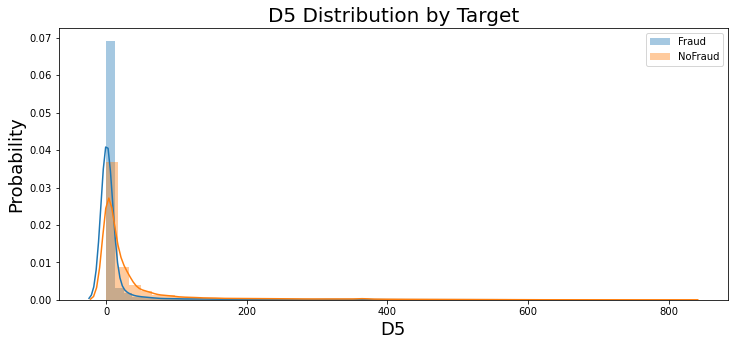

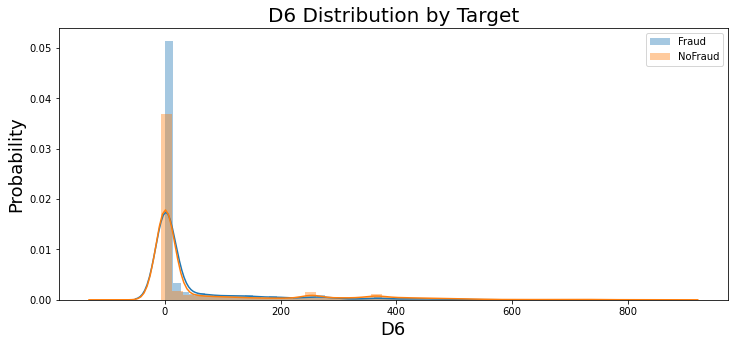

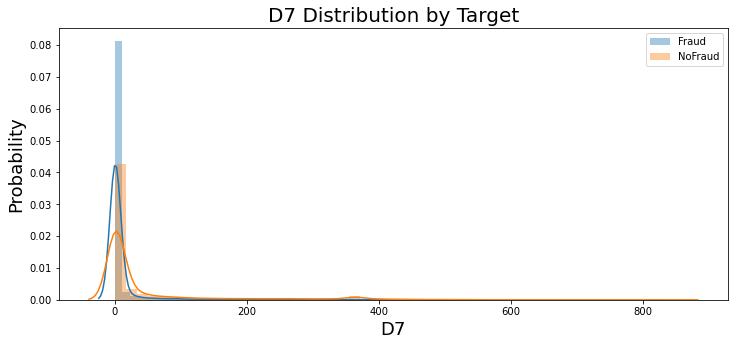

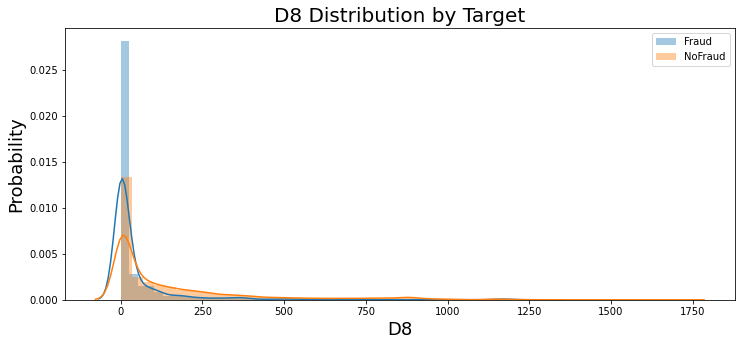

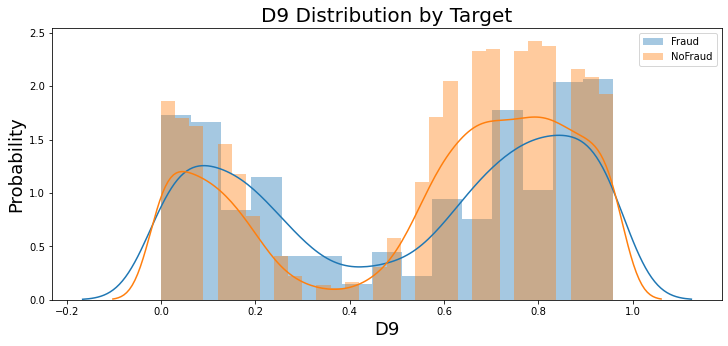

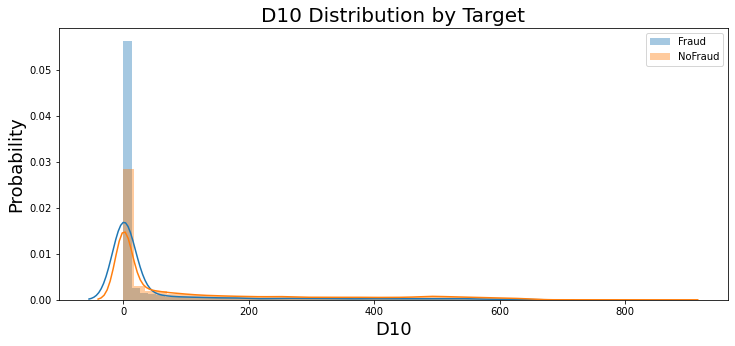

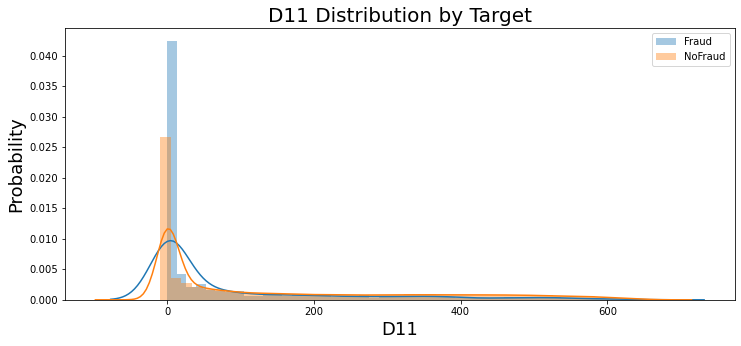

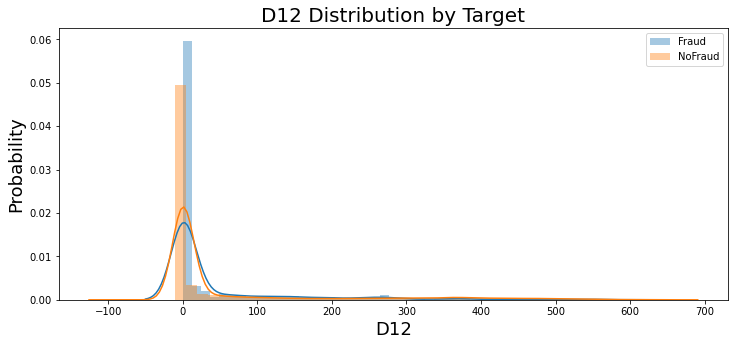

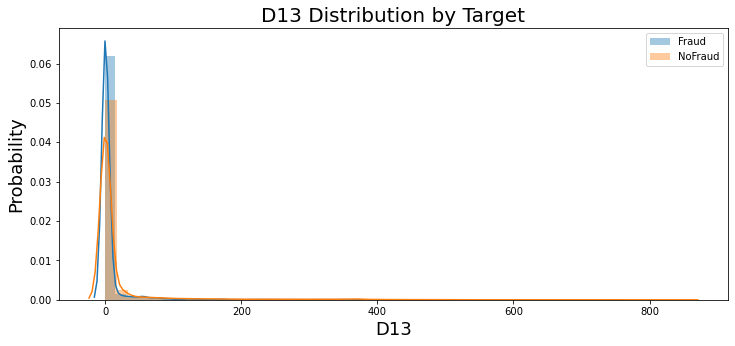

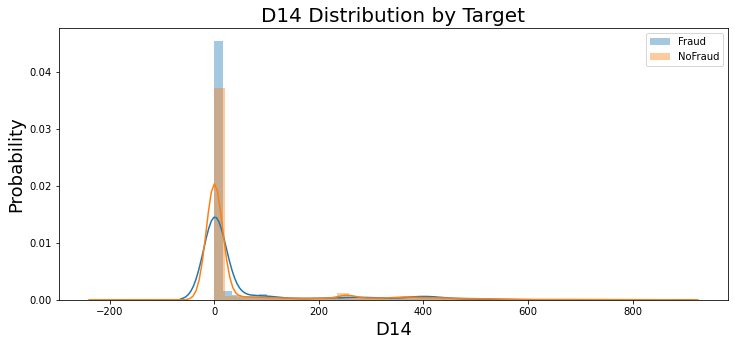

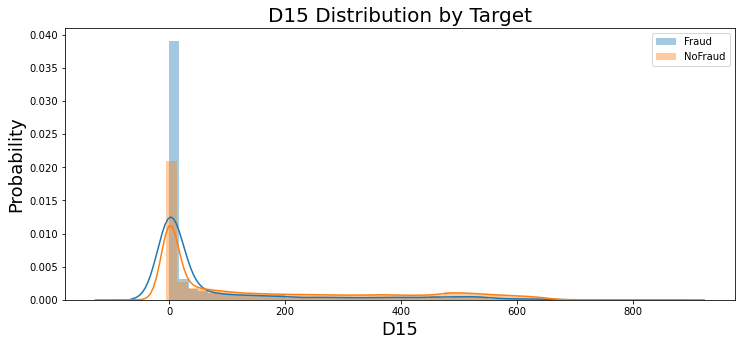

In [58]:
for i in range(0, 15):
    col = 'D%s' % (i+1)
    print(df_trans.groupby(['isFraud'])[col].agg('describe'))
    compare_distribution(df_trans, col, 'isFraud', dict)

# M1-M9
Values are T F or NaN
Column M4 appears to be different with values like M2 and M0

M1-M9：match, such as names on card and address. I think this is quite straight forward. False would lead to high prob of fraud. However in the case of M1,M5,M7, 'F' result in less fraud rate. And I have no idea why M4 is different from the others.

In [60]:
m_cols = [c for c in df_trans if c[0] == 'M']
df_trans[m_cols].head()

M1   M2   M3   M4   M5   M6   M7   M8   M9
0    T    T    T   M2    F    T  NaN  NaN  NaN
1  NaN  NaN  NaN   M0    T    T  NaN  NaN  NaN
2    T    T    T   M0    F    F    F    F    F
3  NaN  NaN  NaN   M0    T    F  NaN  NaN  NaN
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [92]:
check_cunique(df_trans,m_cols)

feat  nunique
0   M1        2
1   M2        2
2   M3        2
3   M4        3
4   M5        2
5   M6        2
6   M7        2
7   M8        2
8   M9        2

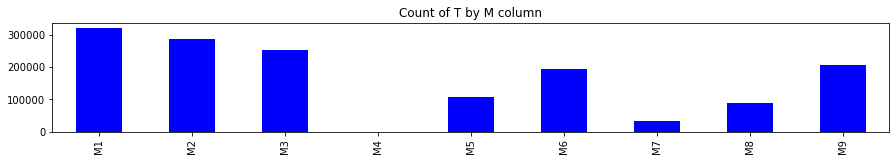

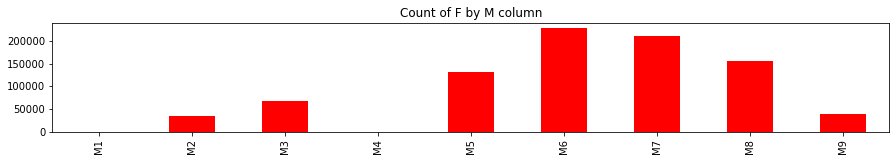

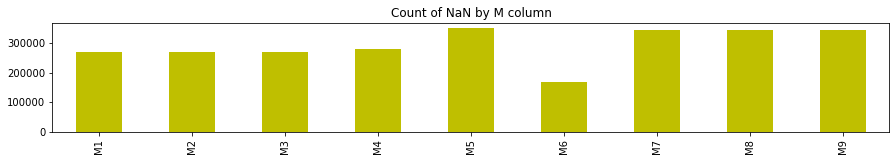

In [62]:
(df_trans[m_cols] == 'T').sum().plot(kind='bar',
                                     title='Count of T by M column',
                                     figsize=(15, 2),
                                     color='b')
plt.show()
(df_trans[m_cols] == 'F').sum().plot(kind='bar',
                                     title='Count of F by M column',
                                     figsize=(15, 2),
                                     color='r')
plt.show()
(df_trans[m_cols].isna()).sum().plot(kind='bar',
                                     title='Count of NaN by M column',
                                     figsize=(15, 2),
                                     color='y')
plt.show()

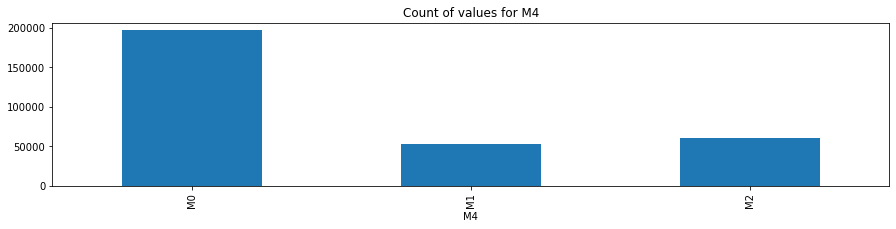

In [64]:
# Looking at M4 column since it is different than the others
df_trans.groupby('M4')['TransactionID'].count().plot(kind='bar',
                                                     title='Count of values for M4',
                                                     figsize=(15, 3))
plt.show()

# V1 - V339
Lots of 1s 0s and Nans, some larger values

In [65]:
v_cols = [c for c in df_trans if c[0] == 'V']
df_trans[v_cols].head()

V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  ...  V330  V331  V332  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  ...   NaN   NaN   NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
2  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  ...   NaN   NaN   NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   0.0   0.0   0.0   

   V333  V334  V335  V336  V337  V338  V339  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 339 columns]

In [95]:
check_cunique(df_trans,v_cols)

feat  nunique
0      V1        2
1      V2        9
2      V3       10
3      V4        7
4      V5        7
..    ...      ...
334  V335      672
335  V336      356
336  V337      254
337  V338      380
338  V339      334

[339 rows x 2 columns]

In [66]:
df_trans[v_cols].describe()

V1             V2             V3             V4  \
count  311253.000000  311253.000000  311253.000000  311253.000000   
mean        0.999945       1.045204       1.078075       0.846456   
std         0.007390       0.240133       0.320890       0.440053   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         1.000000       1.000000       1.000000       1.000000   
max         1.000000       8.000000       9.000000       6.000000   

                  V5             V6             V7             V8  \
count  311253.000000  311253.000000  311253.000000  311253.000000   
mean        0.876991       1.045686       1.072870       1.027704   
std         0.475902       0.239385       0.304779       0.186069   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         1.000000       1.000000       1.000000       1.000000   
max         6.000000       9.000000       9.000000       8.000000   

                  V9            V10  ...          V330           V331  \
count  311253.000000  311253.000000  ...  82351.000000   82351.000000   
mean        1.041529       0.463915  ...      0.775874     721.741883   
std         0.226339       0.521522  ...      4.727971    6217.223583   
min         0.000000       0.000000  ...      0.000000       0.000000   
25%         1.000000       0.000000  ...      0.000000       0.000000   
50%         1.000000       0.000000  ...      0.000000       0.000000   
75%         1.000000       1.000000  ...      0.000000       0.000000   
max         8.000000       4.000000  ...     55.000000  160000.000000   

                V332           V333          V334         V335          V336  \
count   82351.000000   82351.000000  82351.000000  82351.00000  82351.000000   
mean     1375.783644    1014.622782      9.807015     59.16455     28.530903   
std     11169.275702    7955.735482    243.861391    387.62948    274.576920   
min         0.000000       0.000000      0.000000      0.00000      0.000000   
25%         0.000000       0.000000      0.000000      0.00000      0.000000   
50%         0.000000       0.000000      0.000000      0.00000      0.000000   
75%        25.000000       0.000000      0.000000      0.00000      0.000000   
max    160000.000000  160000.000000  55125.000000  55125.00000  55125.000000   

                V337           V338           V339  
count   82351.000000   82351.000000   82351.000000  
mean       55.352422     151.160542     100.700882  
std       668.486833    1095.034387     814.946722  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max    104060.000000  104060.000000  104060.000000  

[8 rows x 339 columns]

In [67]:
df_trans['v_mean'] = df_trans[v_cols].mean(axis=1)

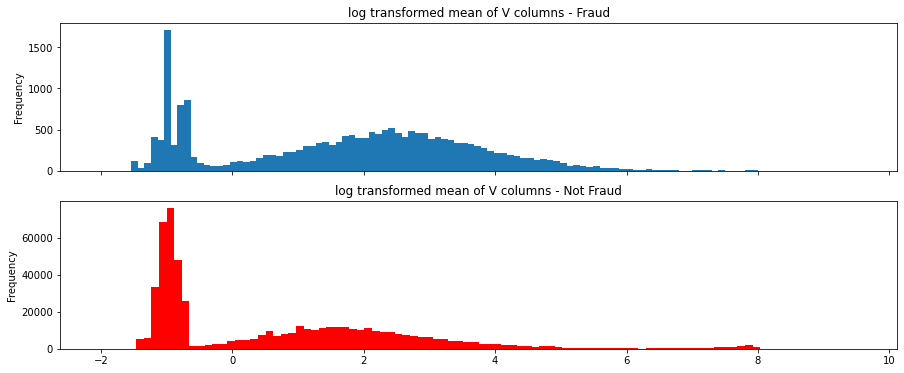

In [68]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 6))
df_trans.loc[df_trans['isFraud'] == 1]['v_mean'] \
    .apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='log transformed mean of V columns - Fraud',
          ax=ax1)
df_trans.loc[df_trans['isFraud'] == 0]['v_mean'] \
    .apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='log transformed mean of V columns - Not Fraud',
          color='r',
          ax=ax2)
plt.show()

# Identity Data
Next we will explore the identity data. These are provided for some, but not all TransactionIDs. It contains information about the identity of the customer.

Categorical Features
DeviceType
DeviceInfo
id_12 - id_38

## Missing value

In [69]:
df_colmissing = check_missing(df_trans,cols=None,axis=0)
print(df_colmissing.head())
df_colmissing.describe()

       missing_num  missing_percent
dist2       552913        93.628374
D7          551623        93.409930
D13         528588        89.509263
D14         528353        89.469469
D12         525823        89.041047


missing_num  missing_percent
count     397.000000       397.000000
mean   240722.130982        40.763053
std    212220.347607        35.936659
min         0.000000         0.000000
25%      1269.000000         0.214888
50%    168969.000000        28.612626
75%    460110.000000        77.913435
max    552913.000000        93.628374

/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='missing_percent'>

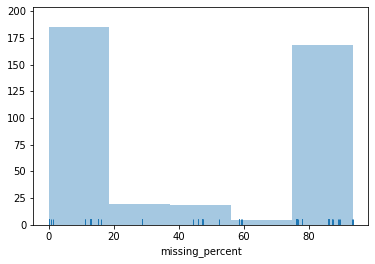

In [70]:
sns.distplot(df_colmissing.missing_percent, kde=False, rug=True)

In [71]:
df_rowmissing = check_missing(df_trans,cols=None,axis=1)
print(df_rowmissing.head())
df_rowmissing.describe()

        missing_num  missing_percent
522237          300        75.566751
522280          296        74.559194
474068          292        73.551637
31095           292        73.551637
474362          292        73.551637


missing_num  missing_percent
count  590540.000000    590540.000000
mean      161.829319        40.763053
std        39.122871         9.854627
min        23.000000         5.793451
25%       168.000000        42.317380
50%       171.000000        43.073048
75%       189.000000        47.607053
max       300.000000        75.566751

/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='missing_percent'>

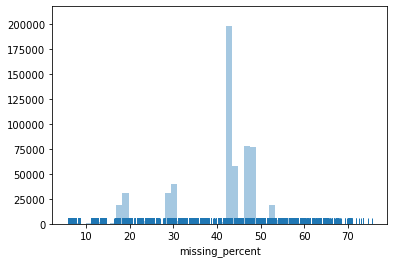

In [72]:
sns.distplot(df_rowmissing.missing_percent, kde=False, rug=True)

In [73]:
df_nunique = check_cunique(df_trans,df_trans.select_dtypes(include=['object']).columns)
df_nunique

feat  nunique
0       ProductCD        5
1           card4        4
2           card6        4
3   P_emaildomain       59
4   R_emaildomain       60
5              M1        2
6              M2        2
7              M3        2
8              M4        3
9              M5        2
10             M6        2
11             M7        2
12             M8        2
13             M9        2
14        card_id    14845

## Device Type

In [74]:
df_all = pd.merge(df_trans,df_identity,on='TransactionID',how='left')

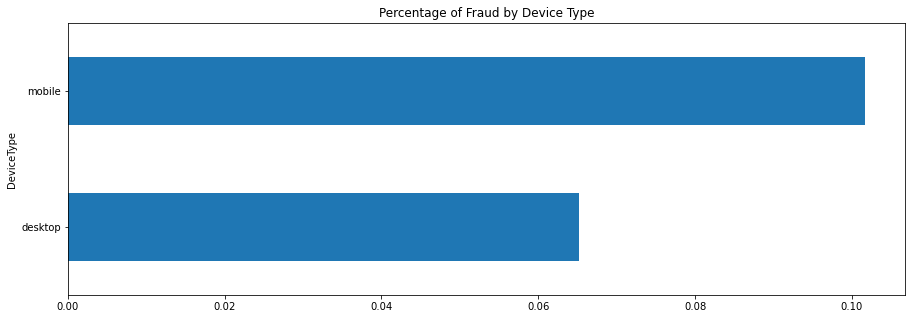

In [76]:
df_all.groupby('DeviceType').mean()['isFraud'].sort_values().plot(kind='barh',
                                                                  figsize=(
                                                                      15, 5),
                                                                  title='Percentage of Fraud by Device Type')
plt.show()

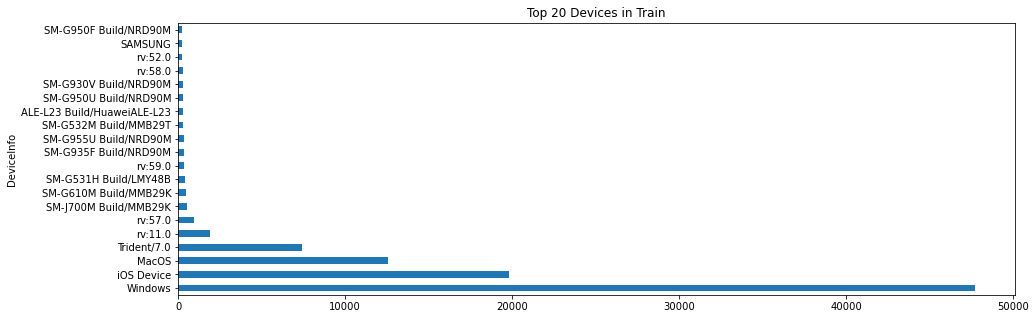

In [79]:
df_all.groupby('DeviceInfo').count()['TransactionID'].sort_values(ascending=False).head(
    20).plot(kind='barh', figsize=(15, 5), title='Top 20 Devices in Train')
plt.show()

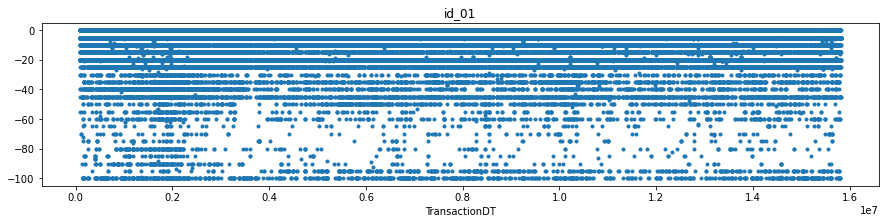

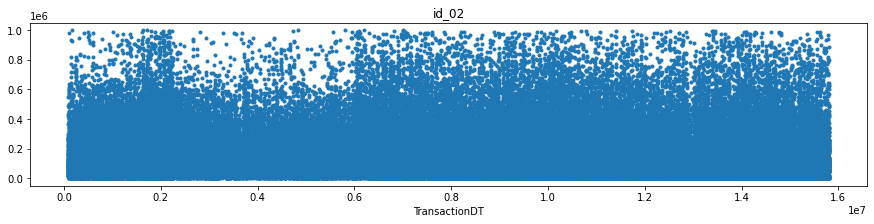

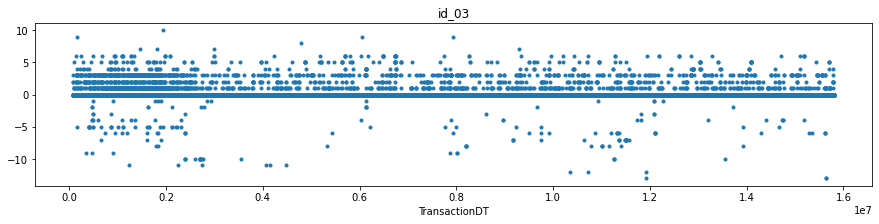

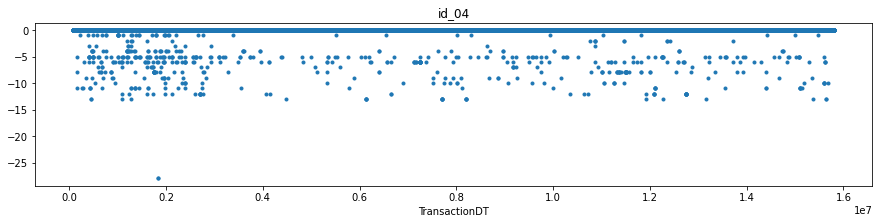

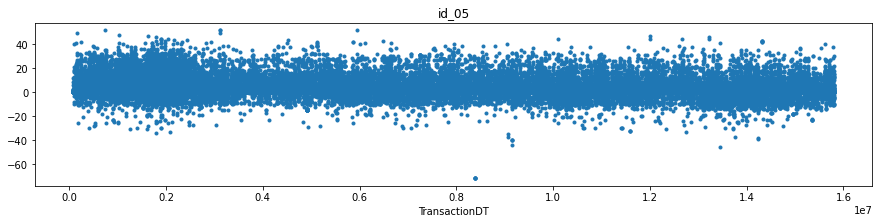

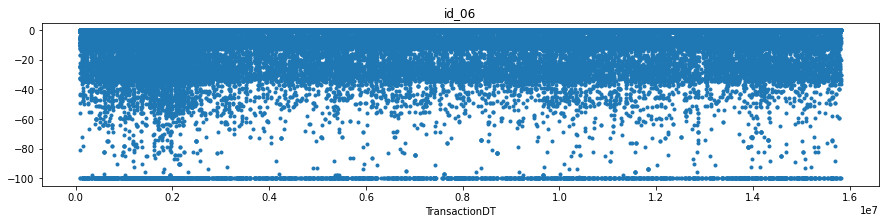

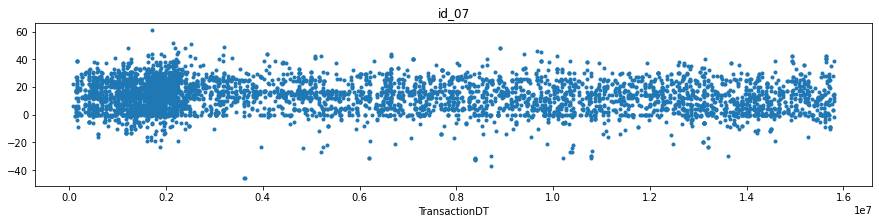

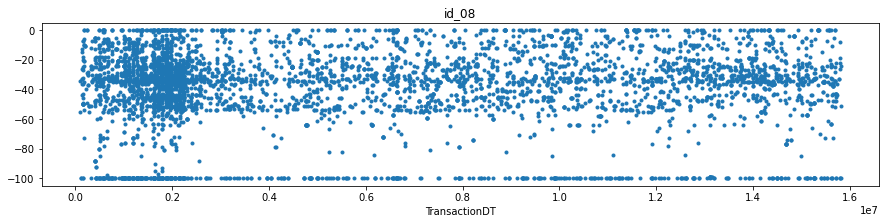

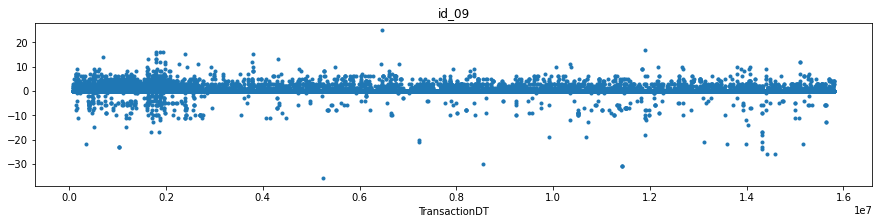

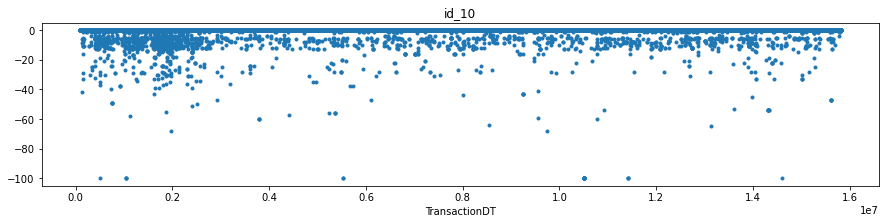

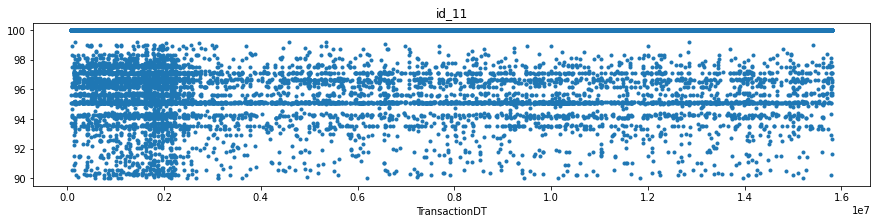

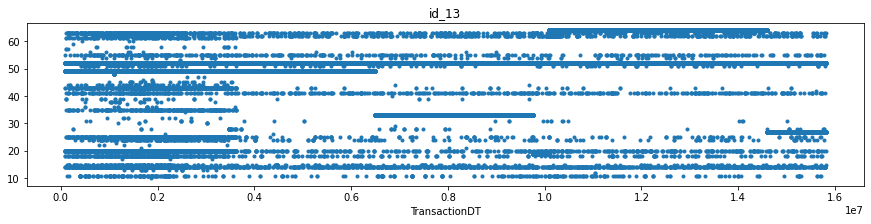

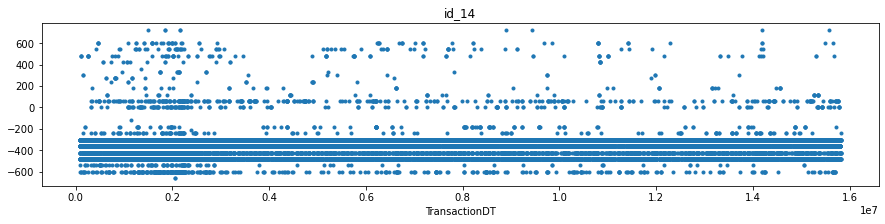

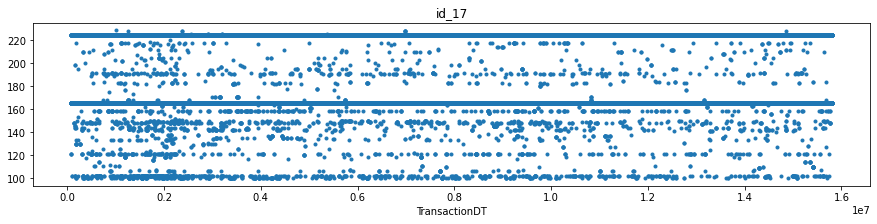

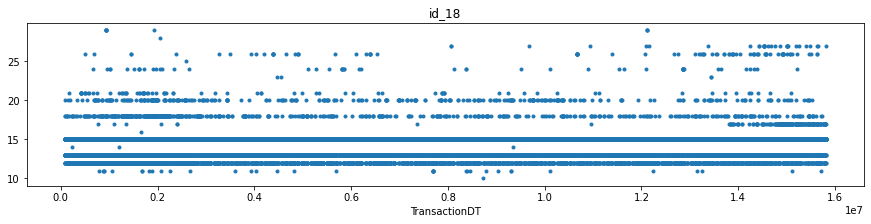

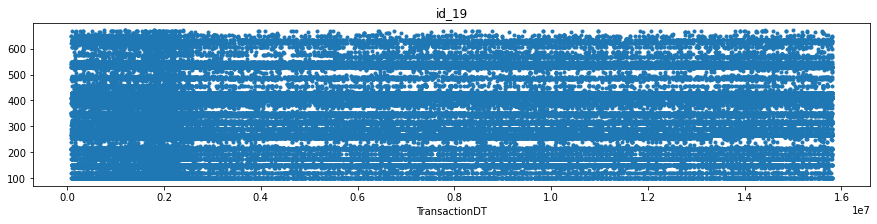

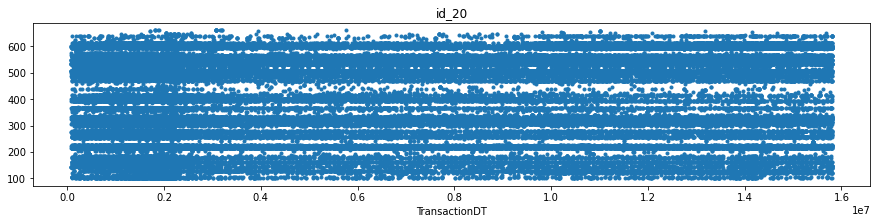

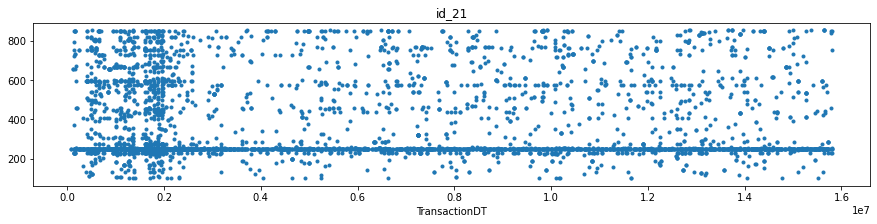

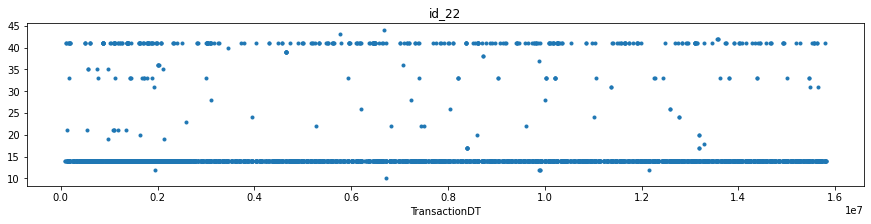

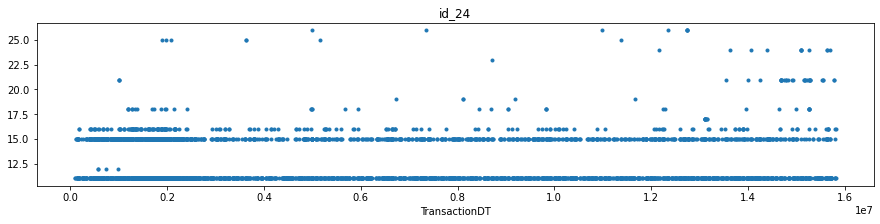

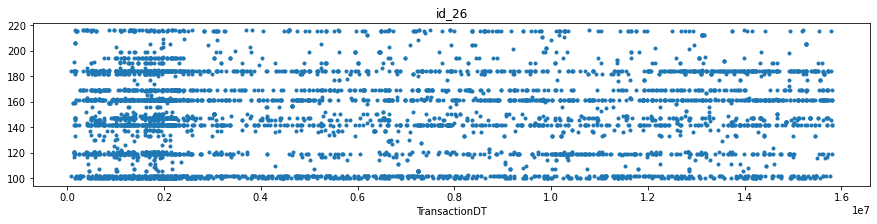

In [80]:
id_cols = [c for c in df_all.columns if 'id' in c]
for i in id_cols:
    try:
        df_all.set_index('TransactionDT')[i].plot(style='.', title=i, figsize=(15, 3))
        plt.show()
    except TypeError:
        pass

In [81]:
compare_cate(df_all,'DeviceInfo','isFraud')

          DeviceInfo  count  sum  mean
0              0PAJ5      1    0   0.0
1              0PJA2      1    0   0.0
2              0PM92      4    2   0.5
3              1016S      1    0   0.0
4              2PQ93      1    0   0.0
...              ...    ...  ...   ...
1781   verykools5004      2    0   0.0
1782   verykools5034      1    0   0.0
1783   verykools5035      1    0   0.0
1784            vivo      5    0   0.0
1785  xs-Z47b7VqTMxs      1    0   0.0

[1786 rows x 4 columns]


In [82]:
compare_cate(df_all,'DeviceType','isFraud')

  DeviceType  count   sum      mean
0    desktop  85165  5554  0.065215
1     mobile  55645  5657  0.101662
